# Heart Disease Classification - Complete Pipeline

This notebook orchestrates the complete ML pipeline by executing modular chapter notebooks in sequence.

**Dataset:** UCI Heart Disease Dataset  
**Models:** Logistic Regression, Random Forest, XGBoost, LightGBM, CatBoost  
**Author:** Michelle  
**Institution:** Centro Europeo de Másteres y Posgrados

## Project Structure

```
src/
├── main.ipynb                    # This file - orchestrator
├── config.py                     # Shared configuration
├── notebooks/                    # Chapter notebooks
│   ├── 01_configuration.ipynb
│   ├── 02_data_understanding.ipynb
│   ├── 03_eda.ipynb
│   ├── 04_preprocessing.ipynb
│   ├── 05_feature_engineering.ipynb
│   ├── 06_modeling.ipynb
│   └── 07_interpretability.ipynb
├── data/                         # Data products
├── models/                       # Trained models
└── outputs/                      # Visualizations
```


In [1]:
# Setup
import sys
sys.path.append('.')
from config import *

print("="*80)
print("HEART DISEASE CLASSIFICATION PIPELINE")
print("="*80)
print(f"Random State: {RANDOM_STATE}")
print(f"Test Size: {TEST_SIZE}")
print(f"Data Path: {DATA_PATH}")
print(f"Models Directory: {MODELS_DIR}")
print(f"Outputs Directory: {OUTPUT_DIR}")
print("="*80)

Configuración cargada:
  - Random State: 42
  - Test Size: 0.2
  - Data Path: c:\Users\Usuario\Documents\TFM\src\data\raw\heart.csv
  - Models Directory: c:\Users\Usuario\Documents\TFM\src\models
  - Outputs Directory: c:\Users\Usuario\Documents\TFM\src\outputs
HEART DISEASE CLASSIFICATION PIPELINE
Random State: 42
Test Size: 0.2
Data Path: c:\Users\Usuario\Documents\TFM\src\data\raw\heart.csv
Models Directory: c:\Users\Usuario\Documents\TFM\src\models
Outputs Directory: c:\Users\Usuario\Documents\TFM\src\outputs


## Chapter 1: Configuration & Preparation

In [2]:
print("\n" + "="*80)
print("CAPÍTULO 1: CONFIGURACIÓN Y PREPARACIÓN")
print("="*80)
%run notebooks/01_configuration.ipynb


CAPÍTULO 1: CONFIGURACIÓN Y PREPARACIÓN


c:\Users\Usuario\Documents\TFM\.venv\Lib\site-packages\nbformat\__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


Librerias importadas correctamente
✓ Semilla de reproducibilidad establecida: 42
✓ Configuración de visualización aplicada
✓ Paleta de colores definida
✓ Directorio 'outputs' ya existe
✓ Directorio 'models' ya existe
✓ Parámetros globales configurados

INFORMACIÓN DEL ENTORNO
Fecha y hora de ejecución: 2025-12-15 16:35:03
Python version: 3.11.14
Working directory: c:\Users\Usuario\Documents\TFM\src
Random state: 42
Test size: 0.2
CV folds: 5
Output directory: outputs
Models directory: models

✅ Configuración del entorno completada

Cargando dataset...
✓ Dataset cargado exitosamente desde: c:\Users\Usuario\Documents\TFM\src\data\raw\heart.csv
✓ Backup de datos originales creado

INFORMACIÓN BÁSICA DEL DATASET
Dimensiones del dataset: 303 filas × 14 columnas
Número de observaciones: 303
Número de variables: 14
Memoria utilizada: 33.27 KB

📊 Primeras 5 filas del dataset:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



📊 Últimas 5 filas del dataset:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0



📊 Muestra aleatoria de 5 filas:



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
179,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2
60,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2



📋 Variables en el dataset:
--------------------------------------------------------------------------------
 1. age
 2. sex
 3. cp
 4. trestbps
 5. chol
 6. fbs
 7. restecg
 8. thalach
 9. exang
10. oldpeak
11. slope
12. ca
13. thal
14. num
--------------------------------------------------------------------------------
Total: 14 variables

✅ Carga del dataset completada



## Chapter 2: Data Understanding


CAPÍTULO 2: COMPRENSIÓN DE LOS DATOS
Dataset cargado: (303, 14)

DESCRIPCIÓN DE VARIABLES

Tipos de datos:
--------------------------------------------------------------------------------
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

CLASIFICACIÓN DE VARIABLES

✓ Variables continuas (5):
   • age
   • trestbps
   • chol
   • thalach
   • oldpeak

✓ Variables categóricas (8):
   • sex
   • cp
   • fbs
   • restecg
   • exang
   • slope
   • ca
   • thal

✓ Variable objetivo:
   • num (diagnóstico de enfermedad cardíaca)


ESTRUCTURA TÉCNICA DEL DATASET

Información detallada:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (t

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1



ÚLTIMAS 5 OBSERVACIONES


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0



MUESTRA ALEATORIA (10 PACIENTES)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
179,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0,0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0,1
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0,2
60,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
119,65.0,1.0,4.0,135.0,254.0,0.0,2.0,127.0,0.0,2.8,2.0,1.0,7.0,2
223,53.0,1.0,4.0,123.0,282.0,0.0,0.0,95.0,1.0,2.0,2.0,2.0,7.0,3
268,40.0,1.0,4.0,152.0,223.0,0.0,0.0,181.0,0.0,0.0,1.0,0.0,7.0,1
33,59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0,0



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS

Estadísticas completas:


,count,mean,std,min,25%,50%,75%,max,rango,cv
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0,48.0,16.603302
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0,1.0,68.733760
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0,3.0,30.398961
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0,106.0,13.364552
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0,438.0,20.988396
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0,1.0,239.839902
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0,2.0,100.492100
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0,131.0,15.290036
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0,1.0,143.785579
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2,6.2,111.684359



INTERPRETACIÓN CLÍNICA DE ESTADÍSTICAS CLAVE

📊 EDAD (age):
   • Rango: 29 - 77 años
   • Media: 54.4 años (±9.0)
   • Mediana: 56 años
   • Interpretación: Población adulta con edad promedio de mediana edad

📊 PRESIÓN ARTERIAL (trestbps):
   • Rango: 94 - 200 mm Hg
   • Media: 131.7 mm Hg (±17.6)
   • Interpretación: Valores >140 mm Hg indican hipertensión

📊 COLESTEROL (chol):
   • Rango: 126 - 564 mg/dl
   • Media: 246.7 mg/dl (±51.8)
   • Interpretación: Valores >240 mg/dl son considerados altos

📊 FRECUENCIA CARDÍACA MÁXIMA (thalach):
   • Rango: 71 - 202 ppm
   • Media: 149.6 ppm (±22.9)
   • Interpretación: FC máxima teórica = 220 - edad

📊 DEPRESIÓN ST (oldpeak):
   • Rango: 0.0 - 6.2
   • Media: 1.04 (±1.16)
   • Interpretación: Valores >1.0 sugieren isquemia significativa


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (num)

📊 Distribución Original (5 clases):
--------------------------------------------------------------------------------
     Frecuencia  Porcentaje (%)
num        

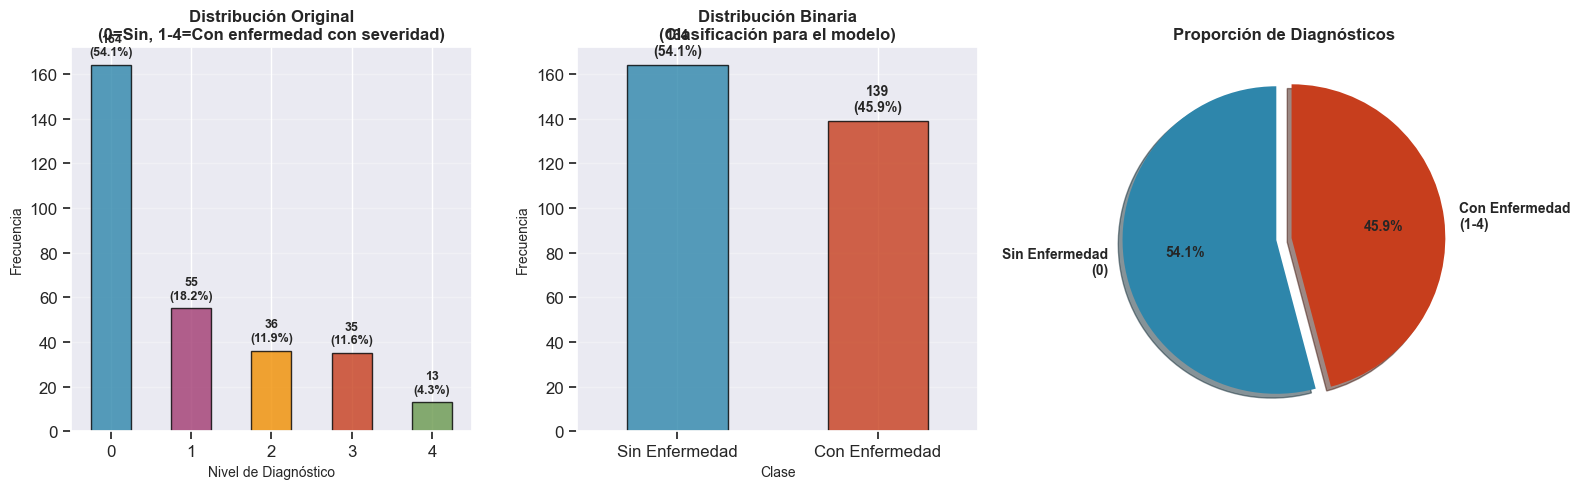


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/01_target_distribution.png


In [3]:
print("\n" + "="*80)
print("CAPÍTULO 2: COMPRENSIÓN DE LOS DATOS")
print("="*80)
%run notebooks/02_data_understanding.ipynb

## Chapter 3: Exploratory Data Analysis


CAPÍTULO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)
Dataset cargado: (303, 14)

ANÁLISIS DE VALORES FALTANTES

Valores faltantes por variable:
--------------------------------------------------------------------------------
          Total_Nulos  Porcentaje (%)
age                 0             0.0
sex                 0             0.0
cp                  0             0.0
trestbps            0             0.0
chol                0             0.0
fbs                 0             0.0
restecg             0             0.0
thalach             0             0.0
exang               0             0.0
oldpeak             0             0.0
slope               0             0.0
ca                  0             0.0
thal                0             0.0
num                 0             0.0
--------------------------------------------------------------------------------

Total de valores faltantes: 0 (0.00% del dataset)

✅ EXCELENTE: No se encontraron valores faltantes en el dataset
   Este data

,Variable,Media,Mediana,Desv_Std,Skewness,Kurtosis
0,age,54.439,56.0,9.039,-0.209,-0.523
1,trestbps,131.690,130.0,17.600,0.706,0.880
2,chol,246.693,241.0,51.777,1.136,4.492
3,thalach,149.607,153.0,22.875,-0.537,-0.054
4,oldpeak,1.040,0.8,1.161,1.270,1.576



📊 Interpretación de Skewness y Kurtosis:
--------------------------------------------------------------------------------
• age         : Distribución aproximadamente simétrica, platicúrtica (colas ligeras)
• trestbps    : Distribución sesgada a la derecha (positiva), leptocúrtica (colas pesadas)
• chol        : Distribución sesgada a la derecha (positiva), leptocúrtica (colas pesadas)
• thalach     : Distribución sesgada a la izquierda (negativa), mesocúrtica (normal)
• oldpeak     : Distribución sesgada a la derecha (positiva), leptocúrtica (colas pesadas)


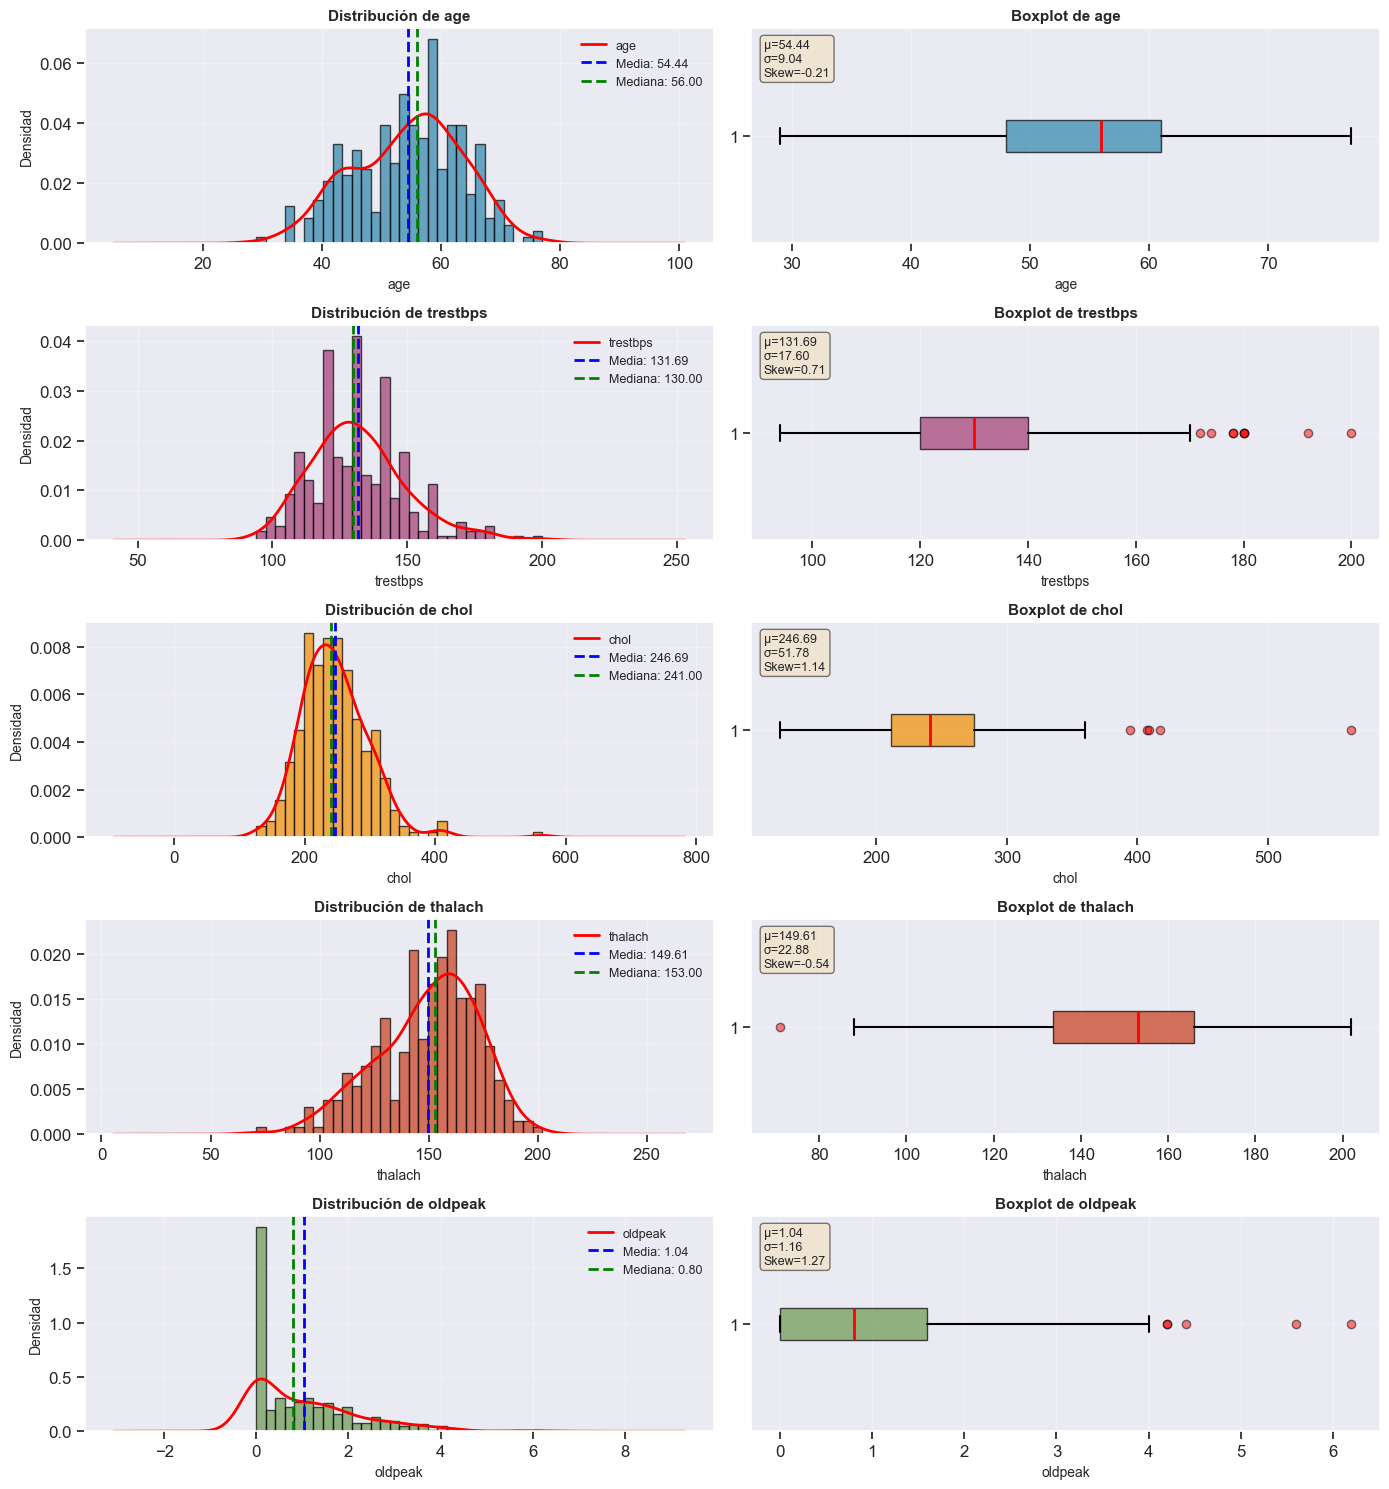


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/03_continuous_distributions.png

ANÁLISIS DE DISTRIBUCIONES - VARIABLES CATEGÓRICAS

Frecuencias absolutas y relativas:
--------------------------------------------------------------------------------

📊 Variable: sex
 Valor  Frecuencia  Porcentaje (%)
   0.0          97           32.01
   1.0         206           67.99

📊 Variable: cp
 Valor  Frecuencia  Porcentaje (%)
   1.0          23            7.59
   2.0          50           16.50
   3.0          86           28.38
   4.0         144           47.52

📊 Variable: fbs
 Valor  Frecuencia  Porcentaje (%)
   0.0         258           85.15
   1.0          45           14.85

📊 Variable: restecg
 Valor  Frecuencia  Porcentaje (%)
   0.0         151           49.83
   1.0           4            1.32
   2.0         148           48.84

📊 Variable: exang
 Valor  Frecuencia  Porcentaje (%)
   0.0         204           67.33
   1.0          99           32.67

📊 Variable: slo

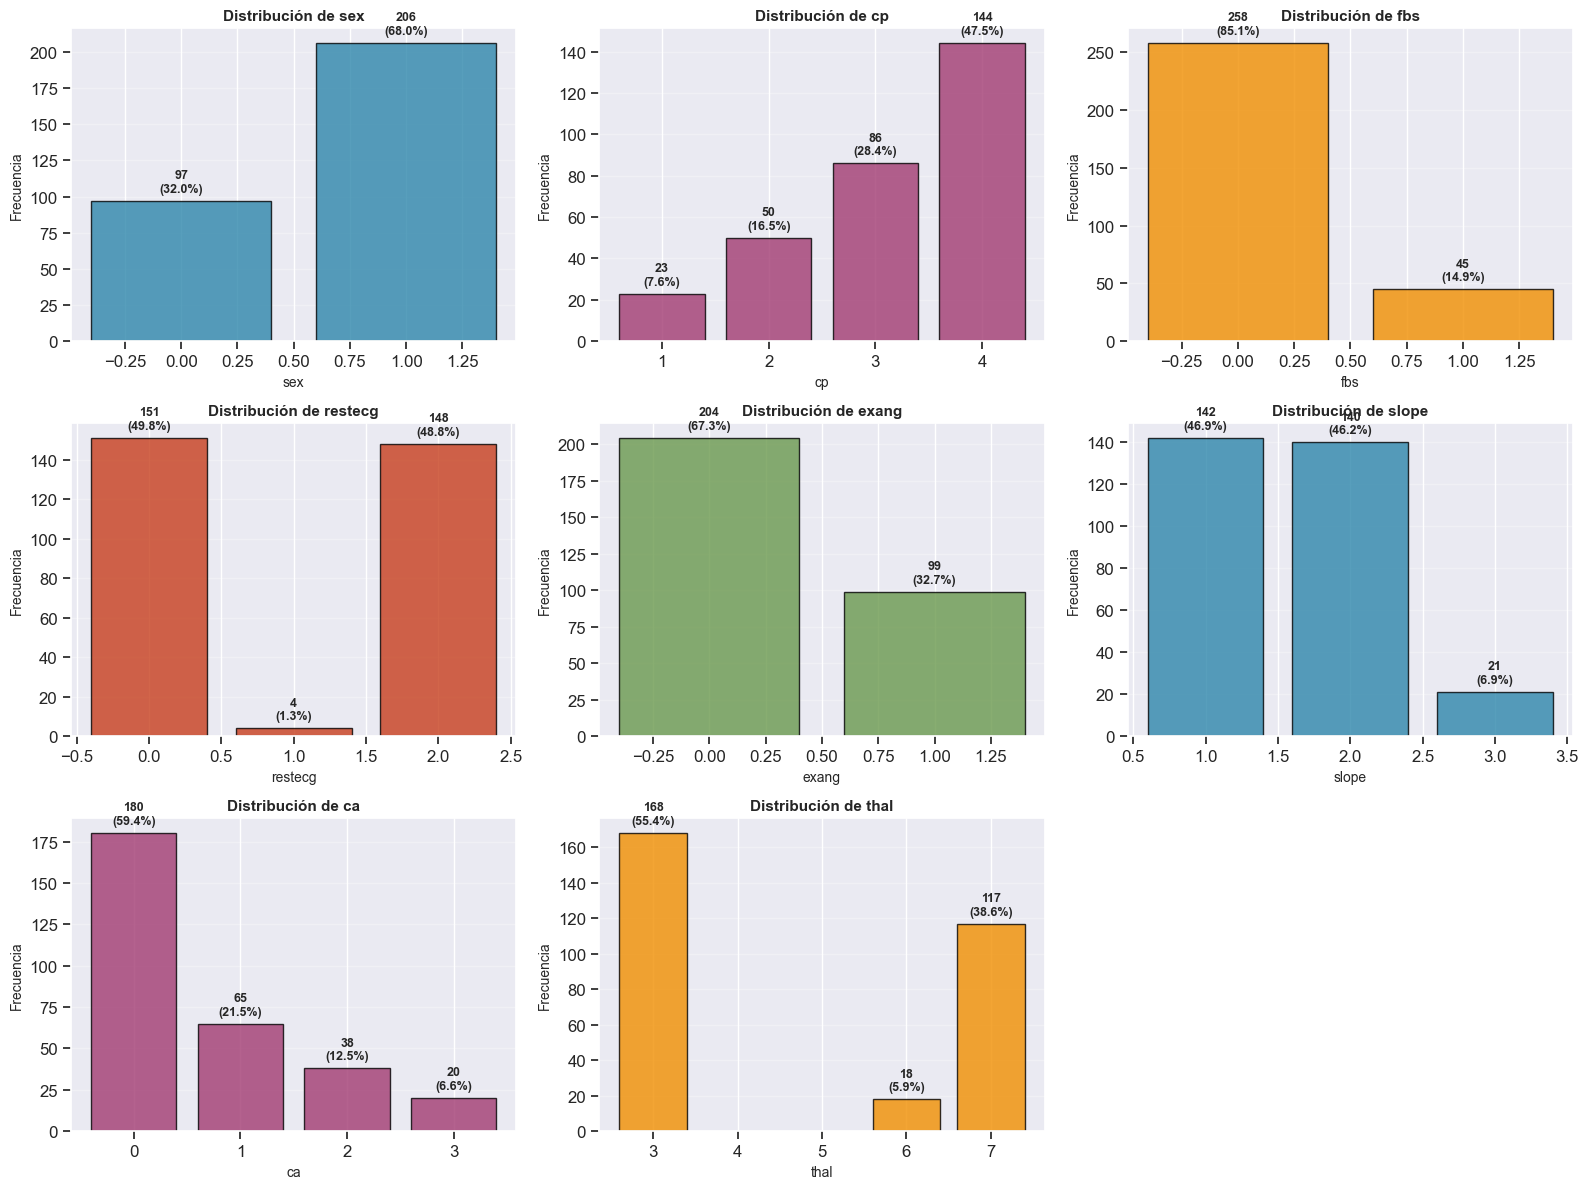


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/04_categorical_distributions.png

VARIABLES CONTINUAS VS VARIABLE OBJETIVO

Comparación de medias entre grupos:
--------------------------------------------------------------------------------


,Variable,Media_Sin_Enfermedad,Media_Con_Enfermedad,Diferencia
0,age,52.59,56.63,4.04
1,trestbps,129.25,134.57,5.32
2,chol,242.64,251.47,8.83
3,thalach,158.38,139.26,-19.12
4,oldpeak,0.59,1.57,0.99



📊 Interpretación clínica de diferencias:
--------------------------------------------------------------------------------
• age         :   7.7% mayor en pacientes con enfermedad
• trestbps    :   4.1% mayor en pacientes con enfermedad
• chol        :   3.6% mayor en pacientes con enfermedad
• thalach     :  12.1% menor en pacientes con enfermedad
• oldpeak     : 168.3% mayor en pacientes con enfermedad


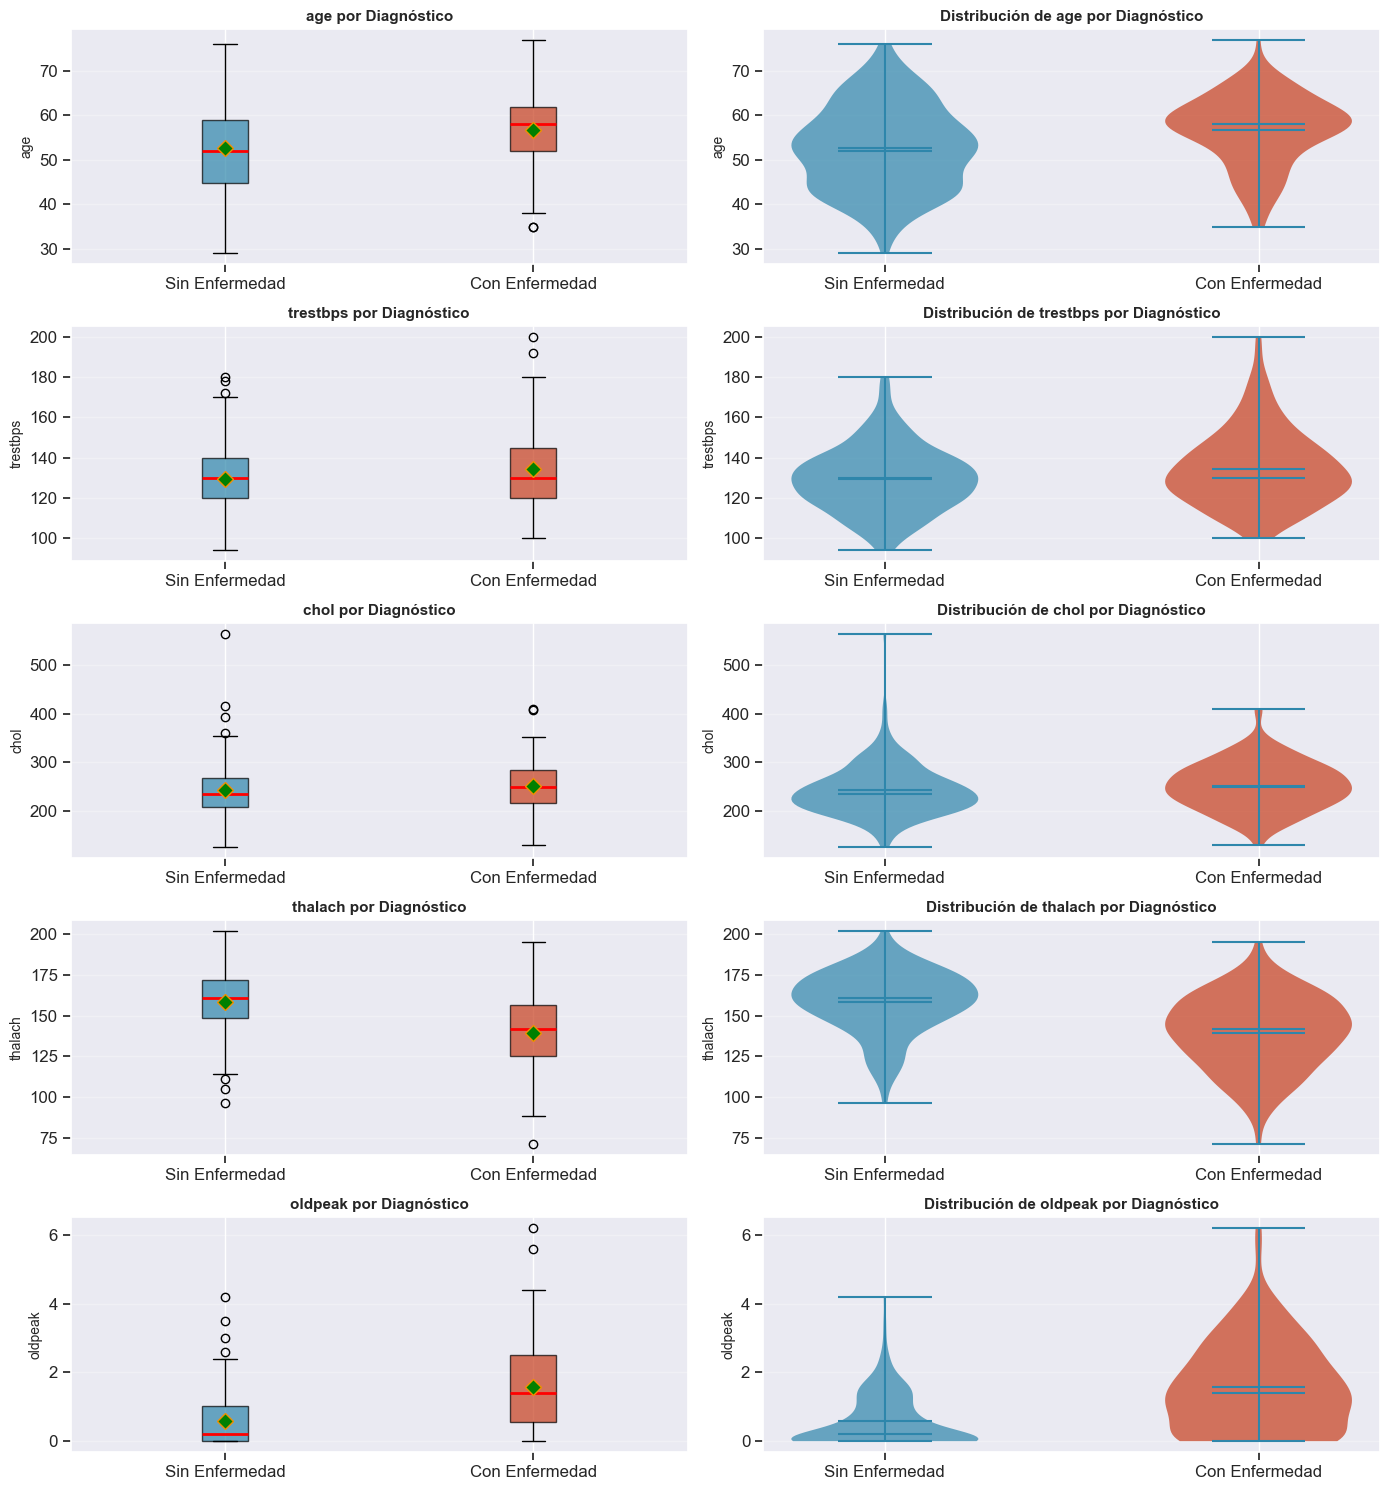


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/05_continuous_vs_target.png

ANÁLISIS DE CORRELACIONES

Correlaciones con la variable objetivo (num):
--------------------------------------------------------------------------------
ca          0.521
thal        0.507
oldpeak     0.504
cp          0.407
exang       0.397
slope       0.378
sex         0.224
age         0.223
restecg     0.184
trestbps    0.158
chol        0.071
fbs         0.059
thalach    -0.415
Name: num, dtype: float64

📊 Top 5 correlaciones más fuertes (valor absoluto):
--------------------------------------------------------------------------------
• ca          : +0.521 (correlación fuerte positiva)
• thal        : +0.507 (correlación fuerte positiva)
• oldpeak     : +0.504 (correlación fuerte positiva)
• thalach     : -0.415 (correlación moderada negativa)
• cp          : +0.407 (correlación moderada positiva)


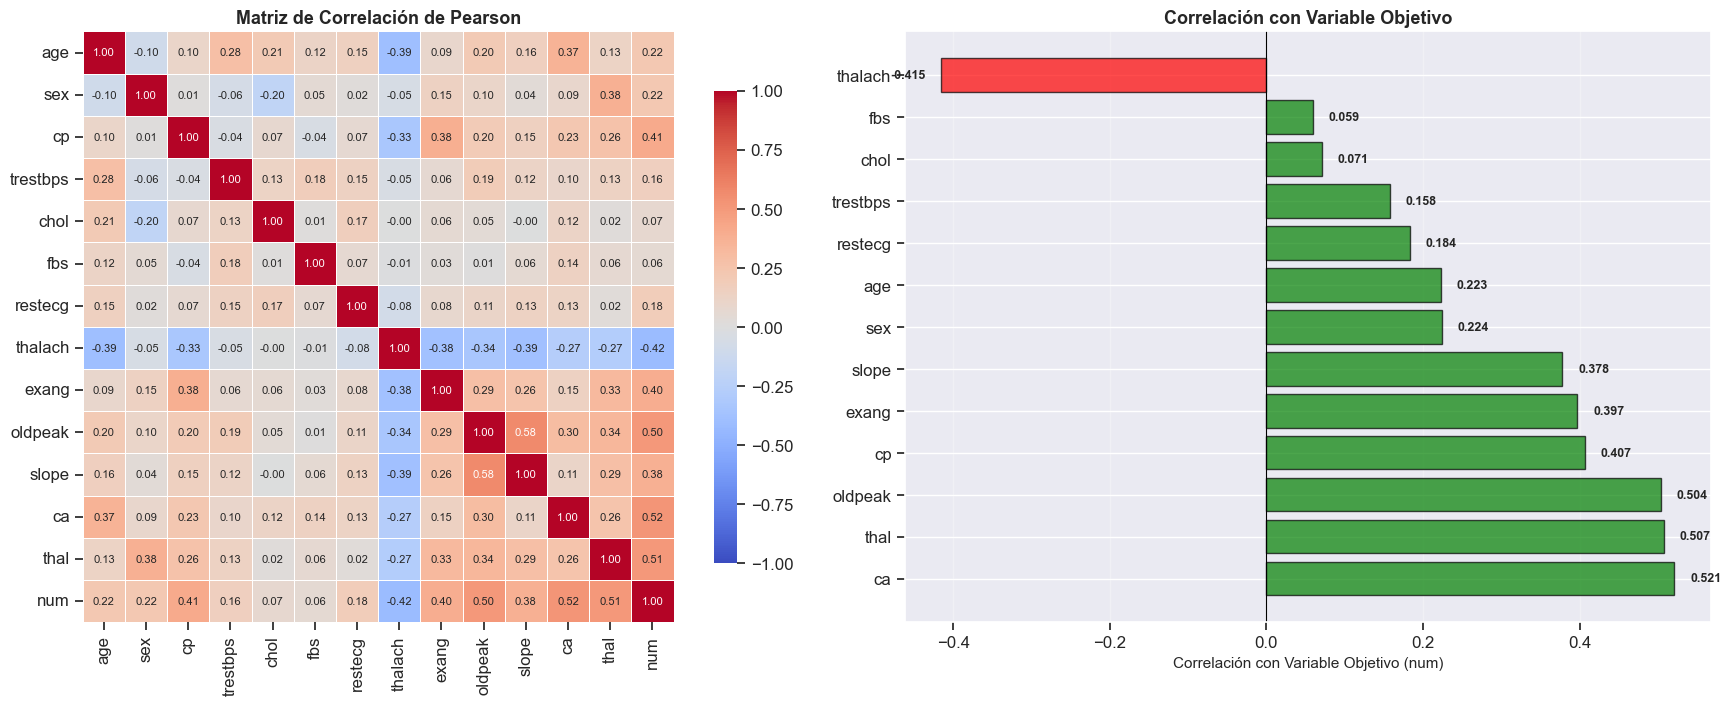


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/07_correlation_matrix.png

DETECCIÓN DE OUTLIERS (Método IQR)

Outliers detectados por variable:
--------------------------------------------------------------------------------
• age         :   0 outliers ( 0.00%) - Rango válido: [28.50, 80.50]
• trestbps    :   9 outliers ( 2.97%) - Rango válido: [90.00, 170.00]
• chol        :   5 outliers ( 1.65%) - Rango válido: [115.00, 371.00]
• thalach     :   1 outliers ( 0.33%) - Rango válido: [84.75, 214.75]
• oldpeak     :   5 outliers ( 1.65%) - Rango válido: [-2.40, 4.00]

Resumen de outliers:


,Variable,Num_Outliers,Porcentaje (%),Límite_Inferior,Límite_Superior
0,age,0,0.00,28.50,80.50
1,trestbps,9,2.97,90.00,170.00
2,chol,5,1.65,115.00,371.00
3,thalach,1,0.33,84.75,214.75
4,oldpeak,5,1.65,-2.40,4.00



🏥 DECISIÓN CLÍNICA SOBRE OUTLIERS:
--------------------------------------------------------------------------------
En contextos médicos, los valores extremos pueden representar:
  1. Casos clínicos reales con características atípicas pero válidas
  2. Errores de medición que requieren corrección

ESTRATEGIA ADOPTADA: Conservar outliers inicialmente.
Justificación: Los valores extremos pueden contener información clínica
valiosa para el diagnóstico. Se evaluará su impacto durante el modelado.


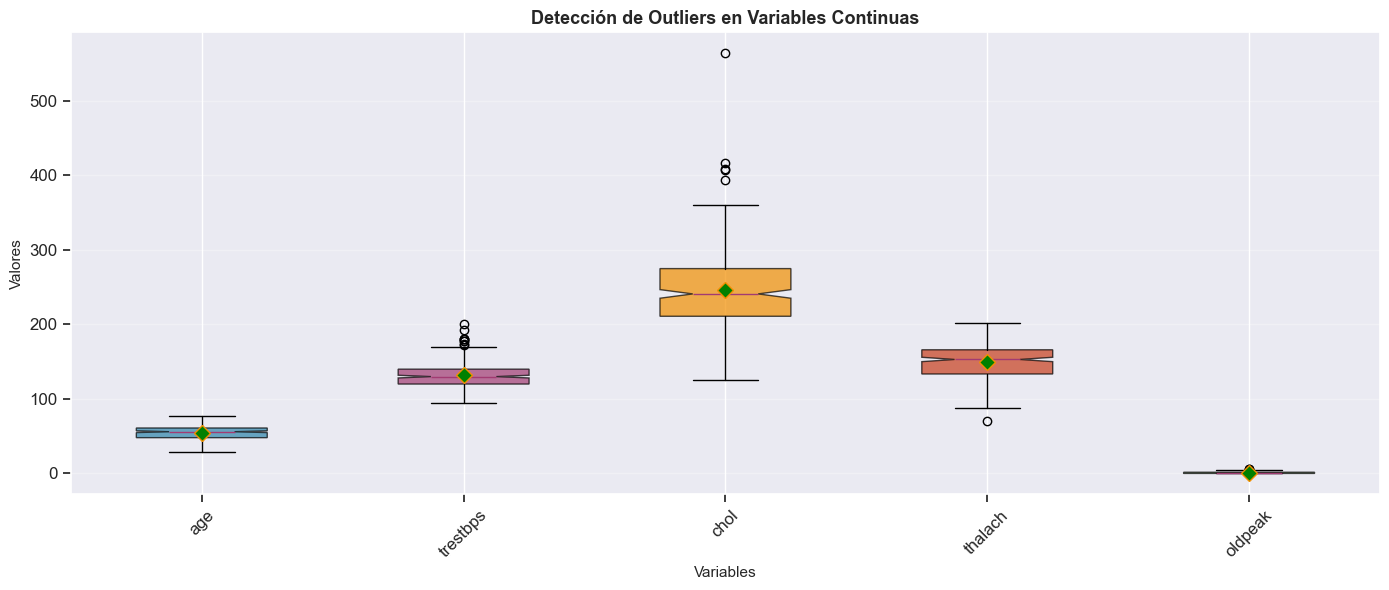


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/08_outliers_analysis.png


In [4]:
print("\n" + "="*80)
print("CAPÍTULO 3: ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*80)
%run notebooks/03_eda.ipynb

## Capítulo 4: Preprocesamiento de Datos


CAPÍTULO 4: PREPROCESAMIENTO DE DATOS
Dataset cargado: (303, 14)

RESUMEN EJECUTIVO DEL EDA

📊 DATASET:
   • Tamaño: 303 observaciones × 14 variables
   • Completitud: 100.0%
   • Balance de clases: [A calcular según análisis previo]

📈 VARIABLES CONTINUAS:
   • Total: 5
   • Con distribución simétrica: [Contar según skewness]
   • Con outliers significativos: 0

📊 VARIABLES CATEGÓRICAS:
   • Total: 8
   • Con asociación significativa (p<0.05): [Contar según chi2]

🎯 TOP 3 VARIABLES MÁS CORRELACIONADAS CON TARGET:

   1. ca: 0.521
   2. thal: 0.507
   3. oldpeak: 0.504

✅ LISTO PARA SIGUIENTE FASE:
   • Preprocesamiento
   • Feature Engineering
   • Modelado


MANEJO DE VALORES FALTANTES

✅ EXCELENTE: No se requiere imputación
   El dataset está completo sin valores faltantes.

TRATAMIENTO DE OUTLIERS

📋 ESTRATEGIA ADOPTADA: Conservar outliers

🔬 JUSTIFICACIÓN CLÍNICA:
   • Los valores extremos pueden ser casos clínicos reales
   • Presión arterial alta, colesterol elevado son condici

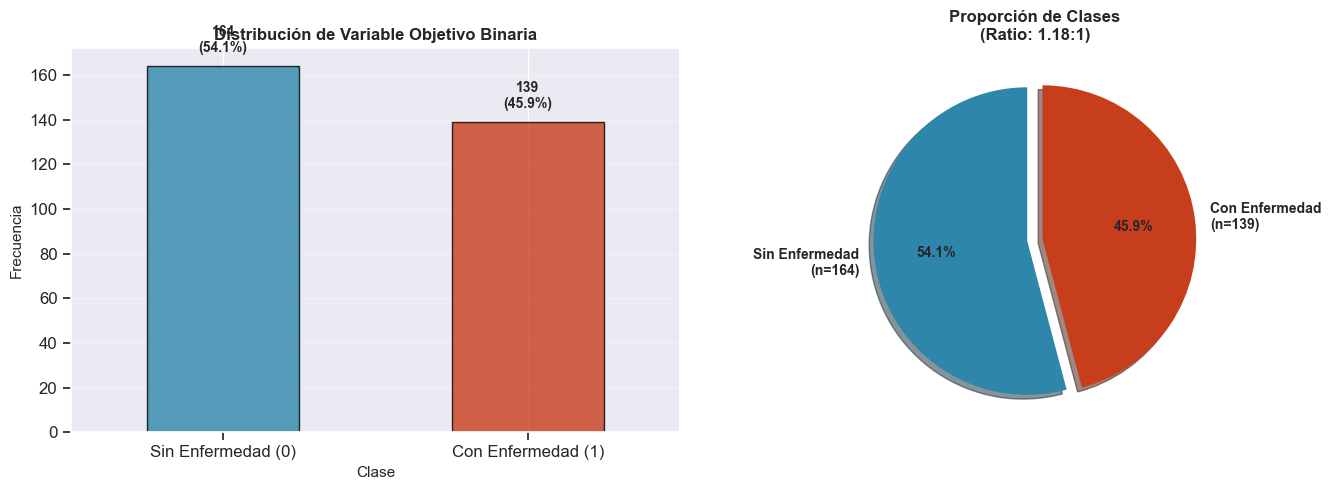


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/09_target_transformation.png

DIVISIÓN DEL DATASET

📊 Dataset completo:
   • Features (X): (303, 13)
   • Target (y): (303,)
   • Total muestras: 303

📊 Conjuntos de entrenamiento y prueba:
TRAIN SET:
   • X_train: (242, 13)
   • y_train: (242,)
   • Distribución de clases: {0: np.int64(131), 1: np.int64(111)}

TEST SET:
   • X_test: (61, 13)
   • y_test: (61,)
   • Distribución de clases: {0: np.int64(33), 1: np.int64(28)}

📈 VERIFICACIÓN DE ESTRATIFICACIÓN:
Proporción clase 0 - Train: 0.541, Test: 0.541
Proporción clase 1 - Train: 0.459, Test: 0.459

✅ Estratificación exitosa: Las proporciones son similares

Guardando productos de datos...
✓ Guardado: c:\Users\Usuario\Documents\TFM\src\data\processed\df_processed.pkl
✓ Guardado: c:\Users\Usuario\Documents\TFM\src\data\processed\train_test_split.pkl

✓ Datos guardados en: c:\Users\Usuario\Documents\TFM\src\data\processed


In [5]:
print("\n" + "="*80)
print("CAPÍTULO 4: PREPROCESAMIENTO DE DATOS")
print("="*80)
%run notebooks/04_preprocessing.ipynb

## Capítulo 5: Feature Engineering & Selección


CAPÍTULO 5: FEATURE ENGINEERING Y SELECCIÓN
Cargando datos del Capítulo 4...
✓ Cargado: c:\Users\Usuario\Documents\TFM\src\data\processed\train_test_split.pkl

X_train shape: (242, 13)
X_test shape: (61, 13)

DIVISIÓN DEL DATASET

📊 Dimensiones:
--------------------------------------------------------------------------------
• Features (X): (303, 13)
• Target (y): (303,)
• Total variables predictoras: 13

📋 Variables predictoras:
--------------------------------------------------------------------------------
    1. age
    2. sex
    3. cp
    4. trestbps
    5. chol
    6. fbs
    7. restecg
    8. thalach
    9. exang
   10. oldpeak
   11. slope
   12. ca
   13. thal
--------------------------------------------------------------------------------

✅ División estratificada completada:
--------------------------------------------------------------------------------
• Training set: 242 muestras (79.9%)
• Test set:     61 muestras (20.1%)
• Test size:    0.2
• Random state: 42
--------

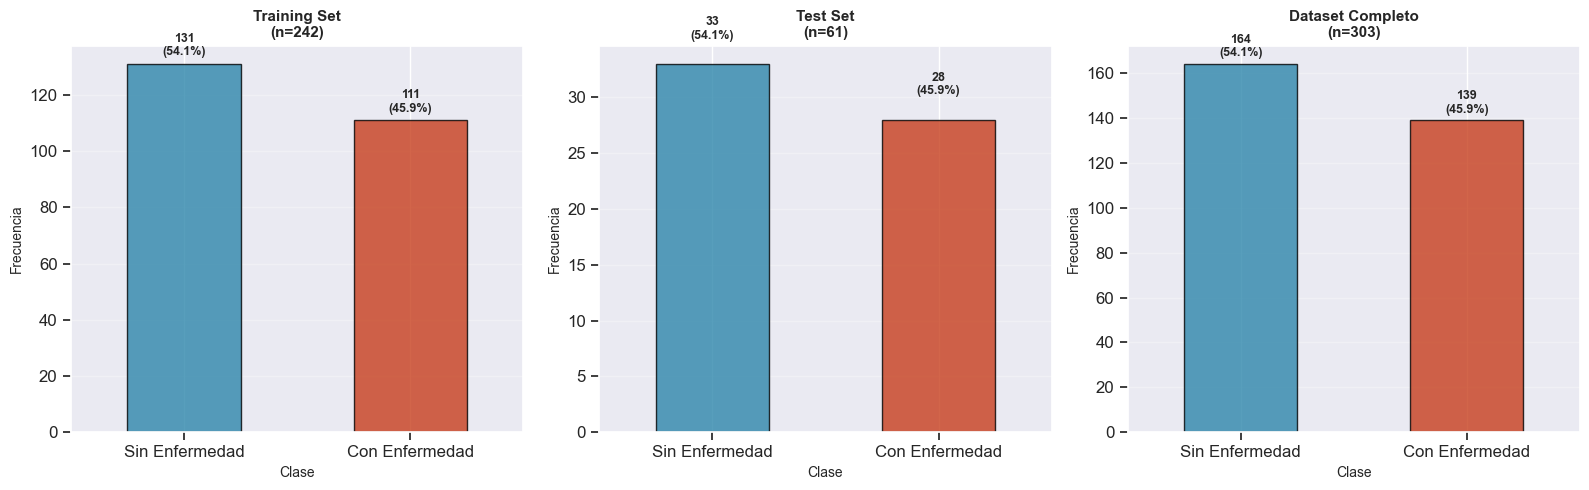


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/10_train_test_split.png

ESCALAMIENTO DE VARIABLES

📋 Variables a escalar (5):
--------------------------------------------------------------------------------
   • age
   • trestbps
   • chol
   • thalach
   • oldpeak
--------------------------------------------------------------------------------

📋 Variables que NO se escalan (8):
--------------------------------------------------------------------------------
   • sex (categórica - mantener valores originales)
   • cp (categórica - mantener valores originales)
   • fbs (categórica - mantener valores originales)
   • restecg (categórica - mantener valores originales)
   • exang (categórica - mantener valores originales)
   • slope (categórica - mantener valores originales)
   • ca (categórica - mantener valores originales)
   • thal (categórica - mantener valores originales)
--------------------------------------------------------------------------------

🔄 Creando dos v

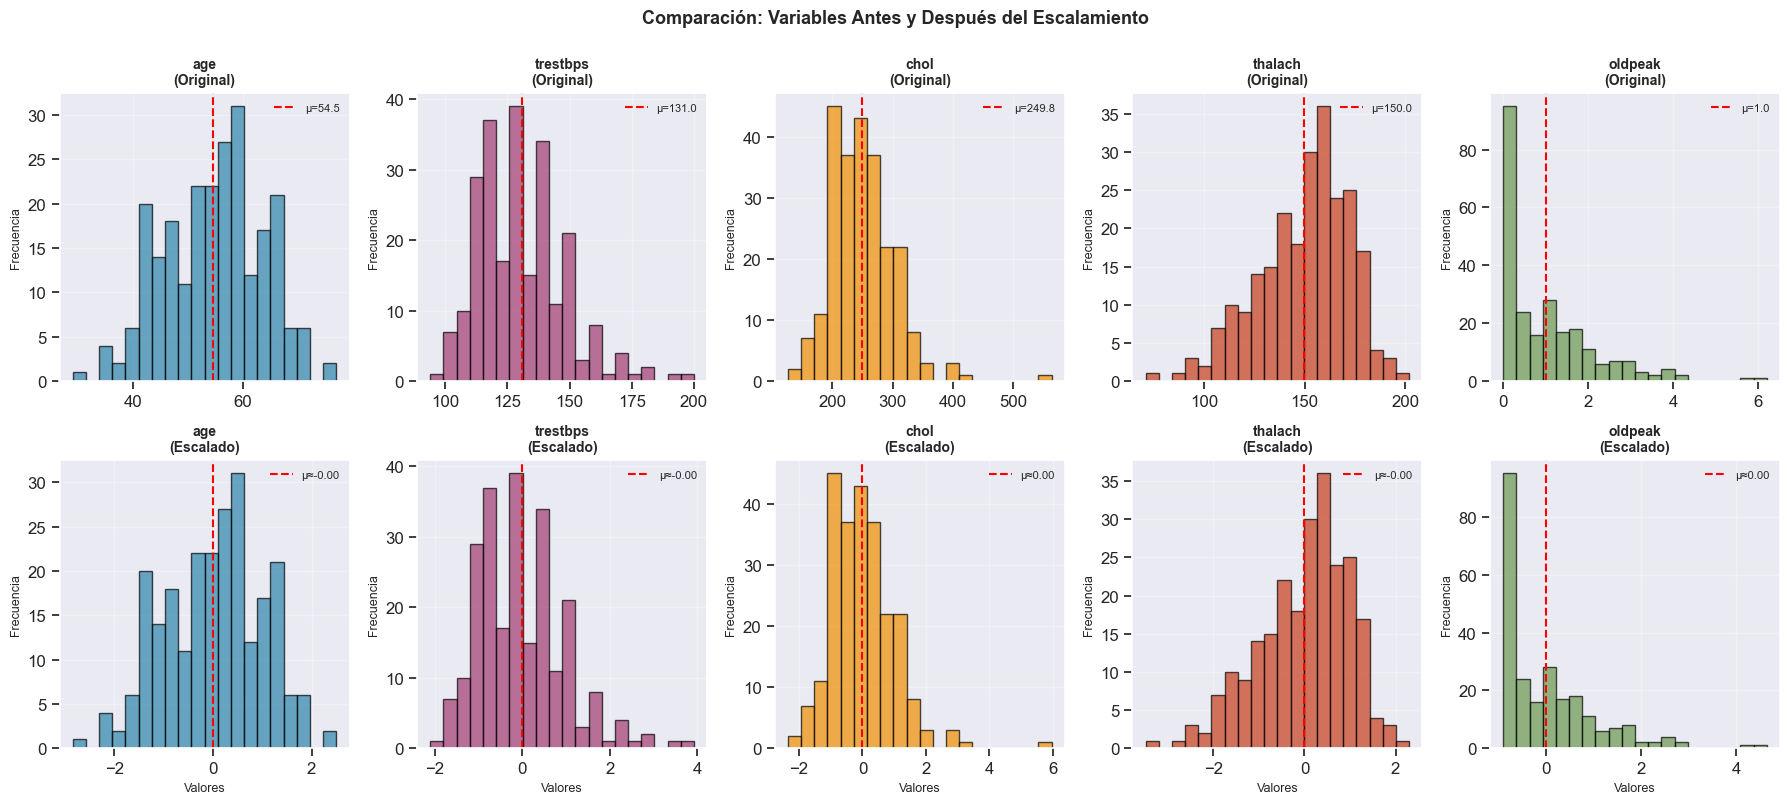


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/11_scaling_comparison.png
✓ Scaler guardado en: c:\Users\Usuario\Documents\TFM\src\models/scaler.pkl

RESUMEN DE DATASETS DISPONIBLES

📦 DATASETS CREADOS:

1️⃣  DATOS SIN ESCALAR (para modelos tree-based):
    • X_train_no_scaled: (242, 13)
    • X_test_no_scaled:  (61, 13)
    • Usar con: Random Forest, XGBoost, LightGBM, CatBoost

2️⃣  DATOS ESCALADOS (para modelos lineales):
    • X_train_scaled: (242, 13)
    • X_test_scaled:  (61, 13)
    • Usar con: Logistic Regression

🎯 TARGET (mismo para ambos):
    • y_train: (242,)
    • y_test:  (61,)


VERIFICACIÓN FINAL DE PREPROCESAMIENTO

📋 Checklist de verificación:
--------------------------------------------------------------------------------
✅ No valores faltantes
✅ Variable target binaria
✅ División train-test correcta
✅ Estratificación correcta
✅ Escalamiento correcto
✅ Dimensiones consistentes

✅✅✅ PREPROCESAMIENTO COMPLETADO EXITOSAMENTE ✅✅✅

🚀 Listo para Feature En

,count,mean,std,min,25%,50%,75%,max
chol_age_ratio,242.0,4.675,1.088,2.099,3.911,4.578,5.333,8.418
bp_category,242.0,1.293,1.160,0.000,0.000,1.000,2.000,3.000
heart_rate_reserve,242.0,15.488,20.840,-29.000,0.000,11.000,27.000,82.000
high_risk_multi,242.0,0.219,0.414,0.000,0.000,0.000,0.000,1.000
age_group,242.0,1.421,0.927,0.000,1.000,2.000,2.000,3.000
age_sex_interaction,242.0,36.802,26.185,0.000,0.000,48.000,57.000,77.000
st_depression_severity,242.0,0.537,0.729,0.000,0.000,0.000,1.000,2.000
functional_capacity,242.0,0.906,0.127,0.464,0.840,0.936,1.000,1.175


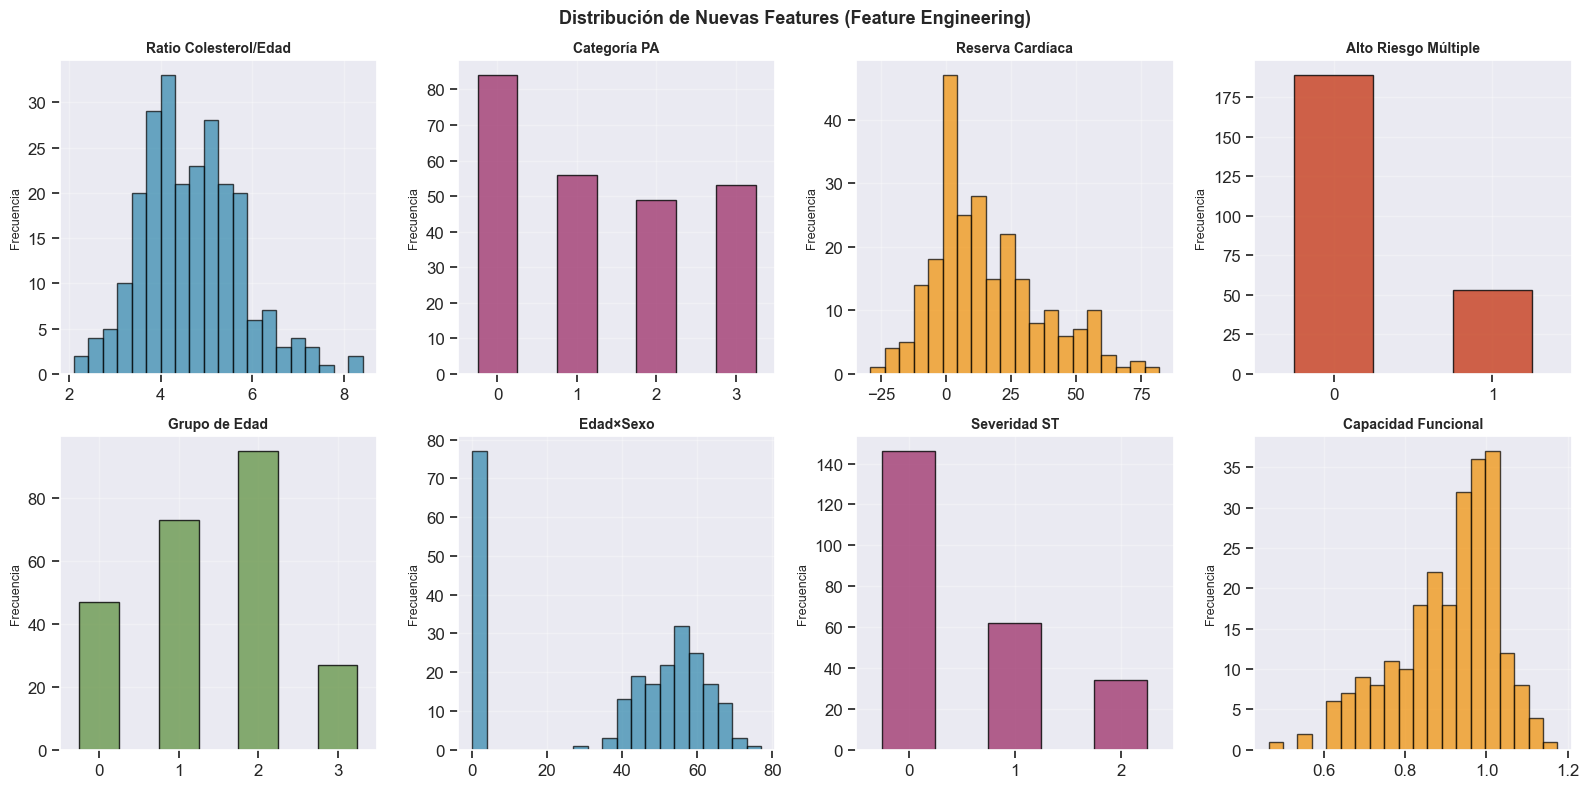


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/12_new_features_distributions.png

FEATURE SELECTION

🎯 Objetivo: Seleccionar las features más importantes mediante métodos estadísticos
--------------------------------------------------------------------------------

📊 Dataset con todas las features:
   • Total features: 21

📊 Top 15 Features por Score Combinado:
--------------------------------------------------------------------------------


,Feature,F-Score,F-Score (norm),MI-Score,MI-Score (norm),Combined Score
12,thal,101.032412,1.000000,0.210885,1.000000,1.000000
11,ca,60.252389,0.594333,0.081420,0.386087,0.490210
7,thalach,48.347133,0.475904,0.088380,0.419093,0.447498
2,cp,45.883288,0.451394,0.088976,0.421915,0.436654
8,exang,51.486909,0.507137,0.073109,0.346678,0.426908
15,heart_rate_reserve,34.662124,0.339770,0.087937,0.416988,0.378379
9,oldpeak,43.615028,0.428830,0.067912,0.322034,0.375432
20,functional_capacity,34.706378,0.340210,0.065287,0.309588,0.324899
19,st_depression_severity,35.166384,0.344786,0.059356,0.281461,0.313123
17,age_group,12.928397,0.123570,0.098364,0.466434,0.295002



✅ Features seleccionadas (Top 15):
--------------------------------------------------------------------------------
    1. thal                           (Score: 1.0000)
    2. ca                             (Score: 0.4902)
    3. thalach                        (Score: 0.4475)
    4. cp                             (Score: 0.4367)
    5. exang                          (Score: 0.4269)
    6. heart_rate_reserve             (Score: 0.3784)
    7. oldpeak                        (Score: 0.3754)
    8. functional_capacity            (Score: 0.3249)
    9. st_depression_severity         (Score: 0.3131)
   10. age_group                      (Score: 0.2950)
   11. age_sex_interaction            (Score: 0.2754)
   12. sex                            (Score: 0.2529)
   13. slope                          (Score: 0.1876)
   14. chol                           (Score: 0.1552)
   15. trestbps                       (Score: 0.1014)
-------------------------------------------------------------------------

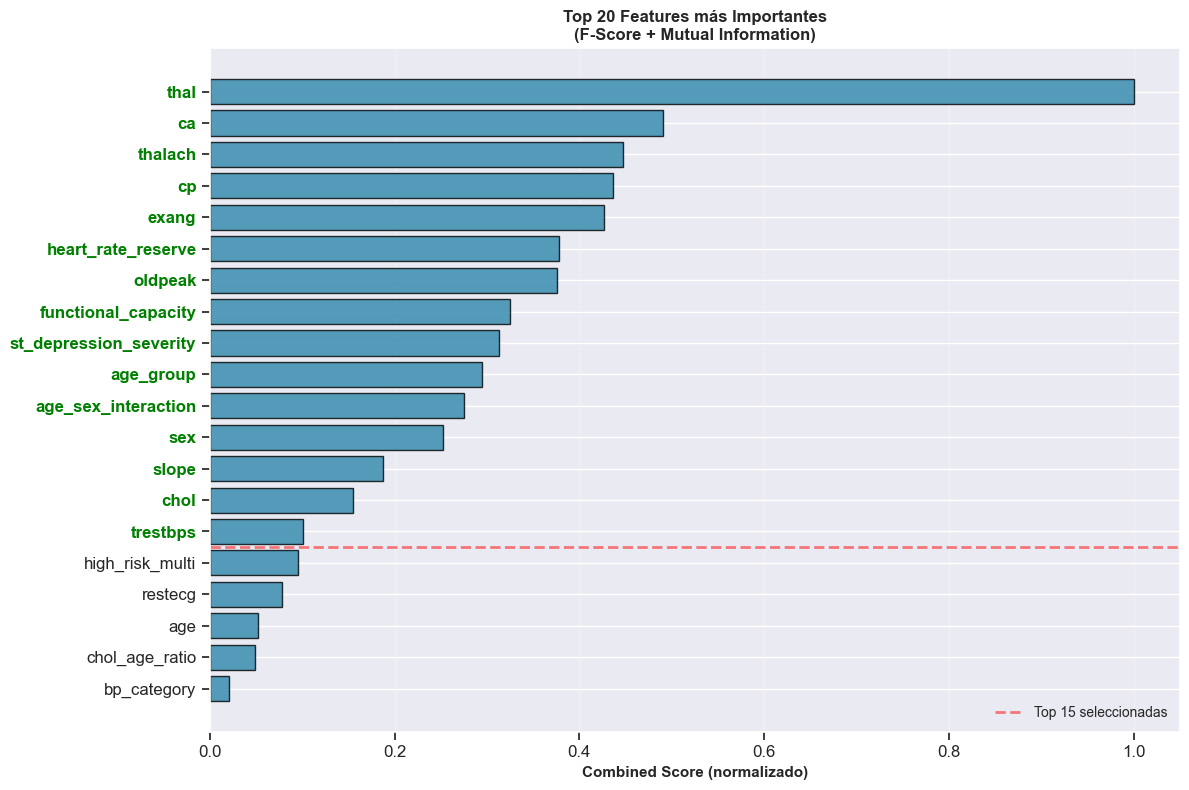


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/13_feature_importance.png

Guardando productos de datos...
✓ Guardado: c:\Users\Usuario\Documents\TFM\src\data\processed\scaled_data.pkl
✓ Guardado: c:\Users\Usuario\Documents\TFM\src\data\processed\final_datasets.pkl
✓ Guardado: c:\Users\Usuario\Documents\TFM\src\data\processed\selected_features.json

✓ Datos guardados en: c:\Users\Usuario\Documents\TFM\src\data\processed


In [6]:
print("\n" + "="*80)
print("CAPÍTULO 5: FEATURE ENGINEERING Y SELECCIÓN")
print("="*80)
%run notebooks/05_feature_engineering.ipynb

## Capitulo 6: Modelado


CAPÍTULO 6: MODELADO - 5 MODELOS ESENCIALES
Cargando datos del Capítulo 5...
✓ Cargado: c:\Users\Usuario\Documents\TFM\src\data\processed\train_test_split.pkl
✓ Cargado: c:\Users\Usuario\Documents\TFM\src\data\processed\final_datasets.pkl

X_train_final_scaled shape: (242, 15)
X_train_final_no_scaled shape: (242, 15)
y_train shape: (242,)

FEATURE SELECTION

📊 Método 1: SelectKBest (ANOVA F-value)
--------------------------------------------------------------------------------
✓ F-Scores calculados para todas las features

📊 Método 2: Mutual Information
--------------------------------------------------------------------------------
✓ Mutual Information calculada para todas las features

📊 Combinación de scores
--------------------------------------------------------------------------------

📋 Ranking de Features por Importancia:


,Feature,F-Score,MI-Score,Combined_Score
12,thal,101.0324,0.2109,1.0000
11,ca,60.2524,0.0814,0.4902
7,thalach,48.3471,0.0884,0.4475
2,cp,45.8833,0.0890,0.4367
8,exang,51.4869,0.0731,0.4269
15,heart_rate_reserve,34.6621,0.0879,0.3784
9,oldpeak,43.6150,0.0679,0.3754
20,functional_capacity,34.7064,0.0653,0.3249
19,st_depression_severity,35.1664,0.0594,0.3131
17,age_group,12.9284,0.0984,0.2950



📊 Top 10 Features más importantes:
--------------------------------------------------------------------------------
   13. thal                      : Score = 1.0000
   12. ca                        : Score = 0.4902
    8. thalach                   : Score = 0.4475
    3. cp                        : Score = 0.4367
    9. exang                     : Score = 0.4269
   16. heart_rate_reserve        : Score = 0.3784
   10. oldpeak                   : Score = 0.3754
   21. functional_capacity       : Score = 0.3249
   20. st_depression_severity    : Score = 0.3131
   18. age_group                 : Score = 0.2950


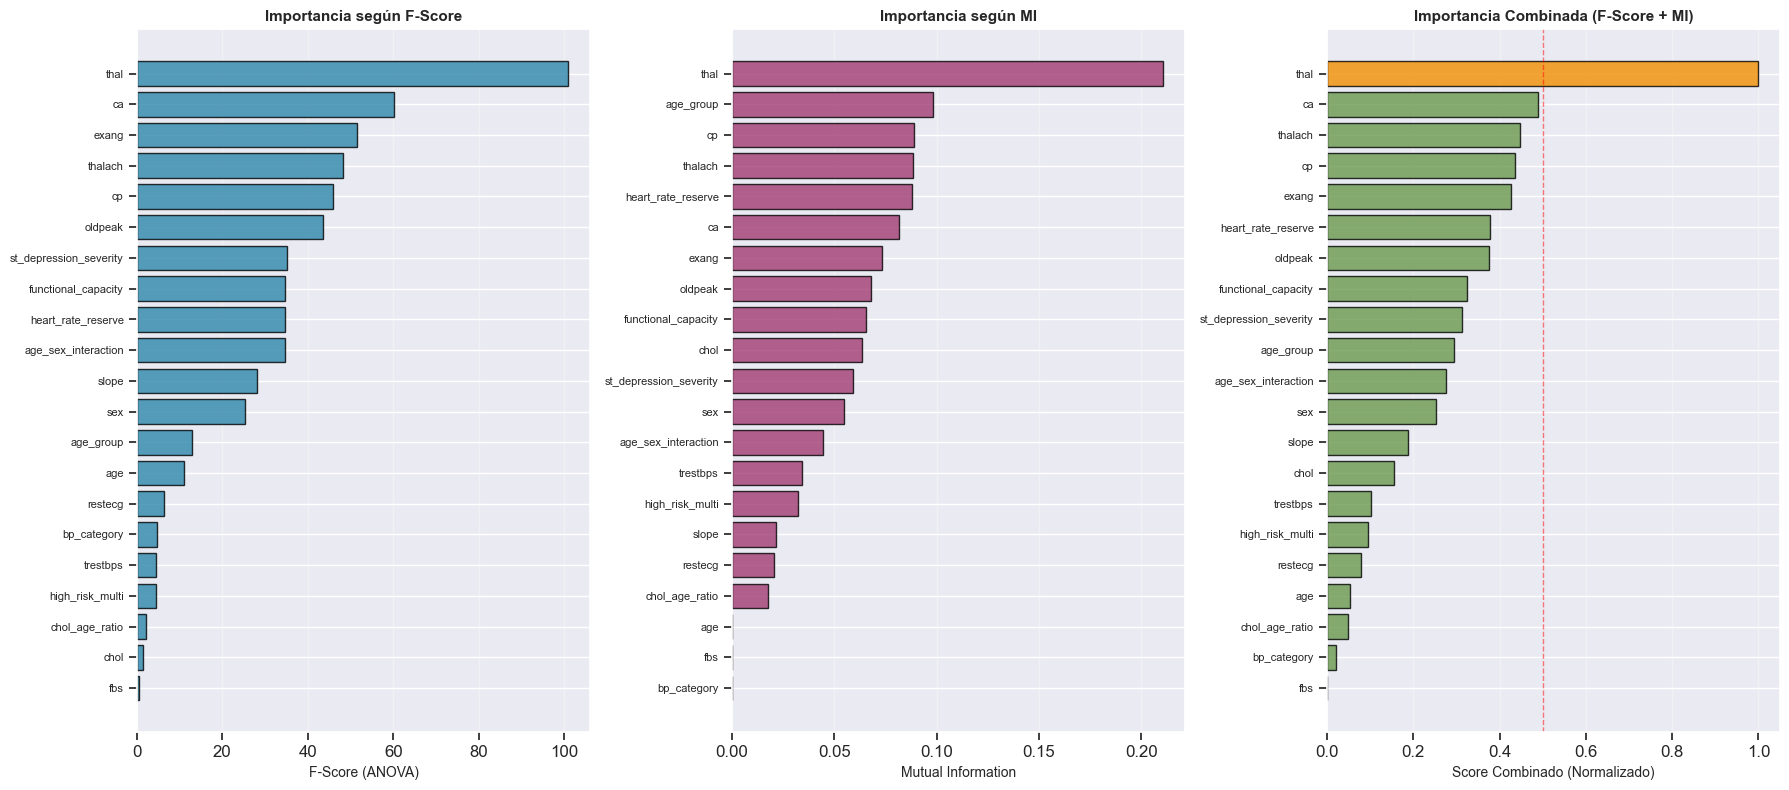


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/13_feature_selection_scores.png

SELECCIÓN FINAL DE FEATURES

📊 Criterio de selección: Combined_Score > 0.3
--------------------------------------------------------------------------------

✅ Features seleccionadas: 9 de 21
   Reducción: 57.1%

📋 Lista de features seleccionadas:
--------------------------------------------------------------------------------
    1. thal                      | Score: 1.0000 | F:   101.03 | MI: 0.2109
    2. ca                        | Score: 0.4902 | F:    60.25 | MI: 0.0814
    3. thalach                   | Score: 0.4475 | F:    48.35 | MI: 0.0884
    4. cp                        | Score: 0.4367 | F:    45.88 | MI: 0.0890
    5. exang                     | Score: 0.4269 | F:    51.49 | MI: 0.0731
    6. heart_rate_reserve        | Score: 0.3784 | F:    34.66 | MI: 0.0879
    7. oldpeak                   | Score: 0.3754 | F:    43.62 | MI: 0.0679
    8. functional_capacity       | Score: 0.

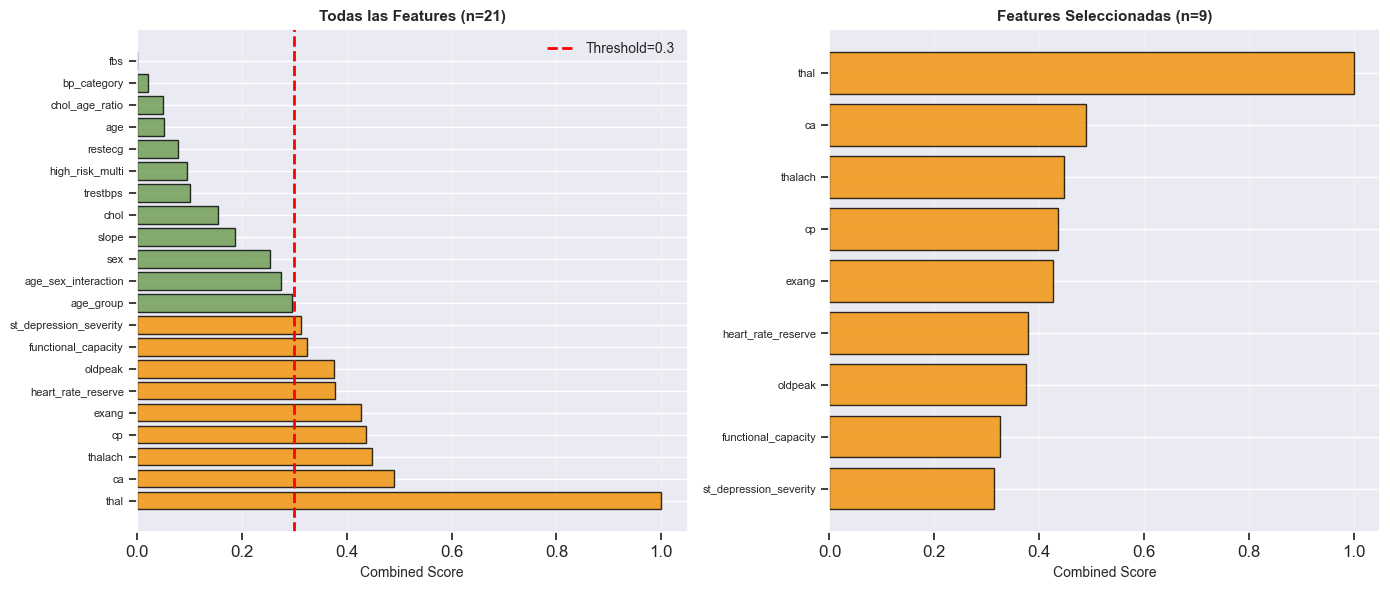


✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/14_feature_selection_final.png

RESUMEN COMPLETO: FEATURE ENGINEERING Y SELECCIÓN


,Etapa,Cantidad
0,Features Originales,13
1,Features Creadas (Engineering),8
2,Total Features Disponibles,21
3,Features Seleccionadas,9
4,Features Descartadas,12
5,Reducción Dimensional,57.1%



📦 DATASETS FINALES DISPONIBLES:


,Dataset,Shape,Uso
0,X_train_final_no_scaled,"(242, 9)",Modelos tree-based (entrenamiento)
1,X_test_final_no_scaled,"(61, 9)",Modelos tree-based (evaluación)
2,X_train_final_scaled,"(242, 9)",Logistic Regression (entrenamiento)
3,X_test_final_scaled,"(61, 9)",Logistic Regression (evaluación)
4,y_train,"(242,)",Target entrenamiento
5,y_test,"(61,)",Target evaluación



✅✅✅ FEATURE ENGINEERING Y SELECCIÓN COMPLETADOS ✅✅✅

🚀 Sistema listo para entrenamiento de modelos de Machine Learning

6.1 MODELO 1: LOGISTIC REGRESSION

🔧 Configuración del modelo:
--------------------------------------------------------------------------------
✓ Modelo configurado:
   • Solver: lbfgs
   • Max iterations: 1000
   • Class weight: balanced
   • Random state: 42
   • Dataset: ESCALADO (StandardScaler)

🎯 Entrenando modelo...
--------------------------------------------------------------------------------
✓ Modelo entrenado en 0.03 segundos

📊 Validación Cruzada (StratifiedKFold, k=5):
--------------------------------------------------------------------------------
   • ACCURACY    : 0.8223 (±0.0214)
   • PRECISION   : 0.8366 (±0.0672)
   • RECALL      : 0.7739 (±0.0660)
   • F1          : 0.7993 (±0.0239)
   • ROC_AUC     : 0.8956 (±0.0161)

🔮 Generando predicciones...
--------------------------------------------------------------------------------
✓ Predicciones gener

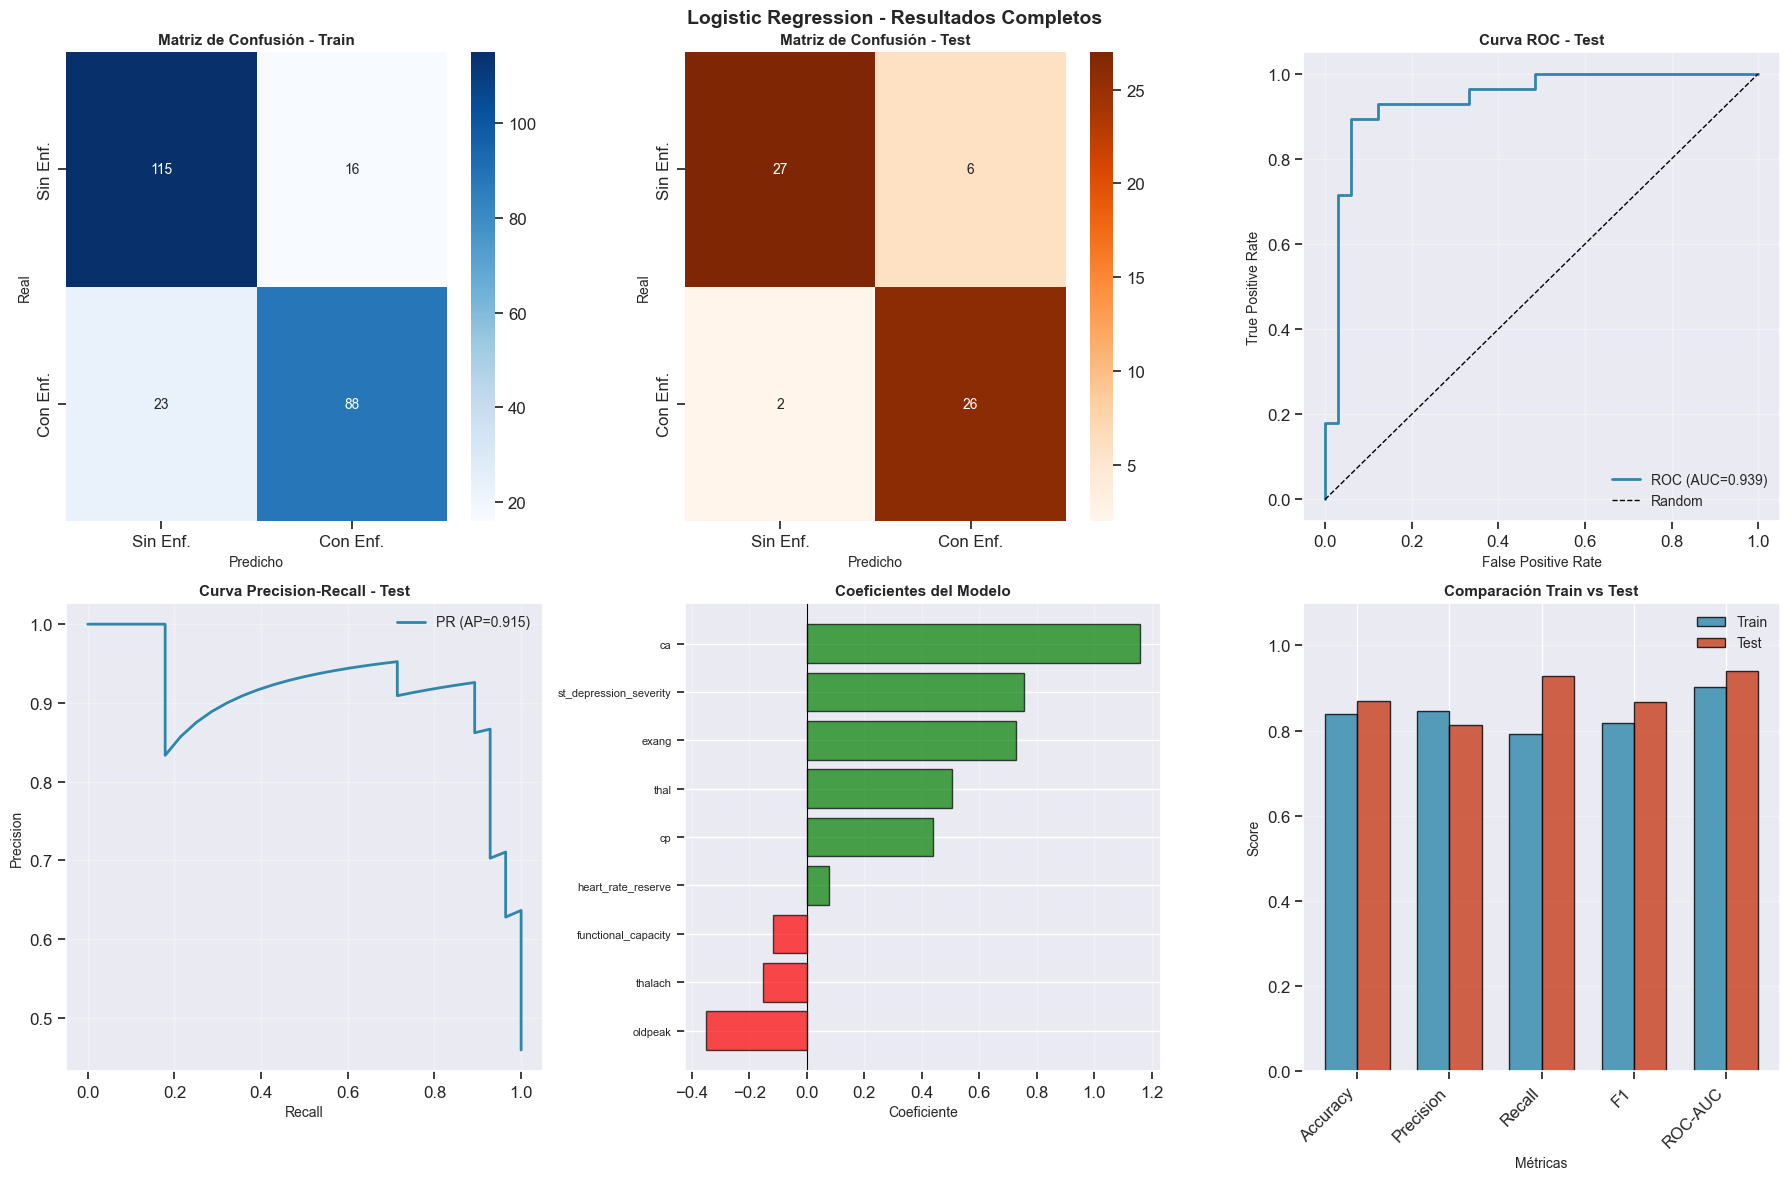

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/15_logistic_regression_results.png

✓ Modelo guardado: c:\Users\Usuario\Documents\TFM\src\models/logistic_regression.pkl

RESUMEN: LOGISTIC REGRESSION


,Métrica,Train,Test
0,Accuracy,0.8388,0.8689
1,Precision,0.8462,0.8125
2,Recall,0.7928,0.9286
3,F1-Score,0.8186,0.8667
4,ROC-AUC,0.9032,0.9394
5,Sensitivity,0.7928,0.9286
6,Specificity,0.8779,0.8182
7,PPV,0.8462,0.8125
8,NPV,0.8333,0.9310



✅ Modelo Baseline completado:
   • Tiempo de entrenamiento: 0.03s
   • ROC-AUC (Test): 0.9394
   • Sensibilidad (Test): 0.9286
   • Especificidad (Test): 0.8182


6.2 MODELO 2: RANDOM FOREST

🔧 Configuración del modelo:
--------------------------------------------------------------------------------
✓ Modelo configurado:
   • N estimators: 200
   • Max depth: 10
   • Min samples split: 10
   • Min samples leaf: 4
   • Max features: sqrt
   • Class weight: balanced
   • Random state: 42
   • Dataset: SIN ESCALAR (original)

🎯 Entrenando modelo...
--------------------------------------------------------------------------------
✓ Modelo entrenado en 0.52 segundos
   • Número de árboles: 200
   • Profundidad efectiva: 10

📊 Validación Cruzada (StratifiedKFold, k=5):
--------------------------------------------------------------------------------
   • ACCURACY    : 0.7974 (±0.0163)
   • PRECISION   : 0.8111 (±0.0708)
   • RECALL      : 0.7466 (±0.0860)
   • F1          : 0.7703 (±0.0237)
 

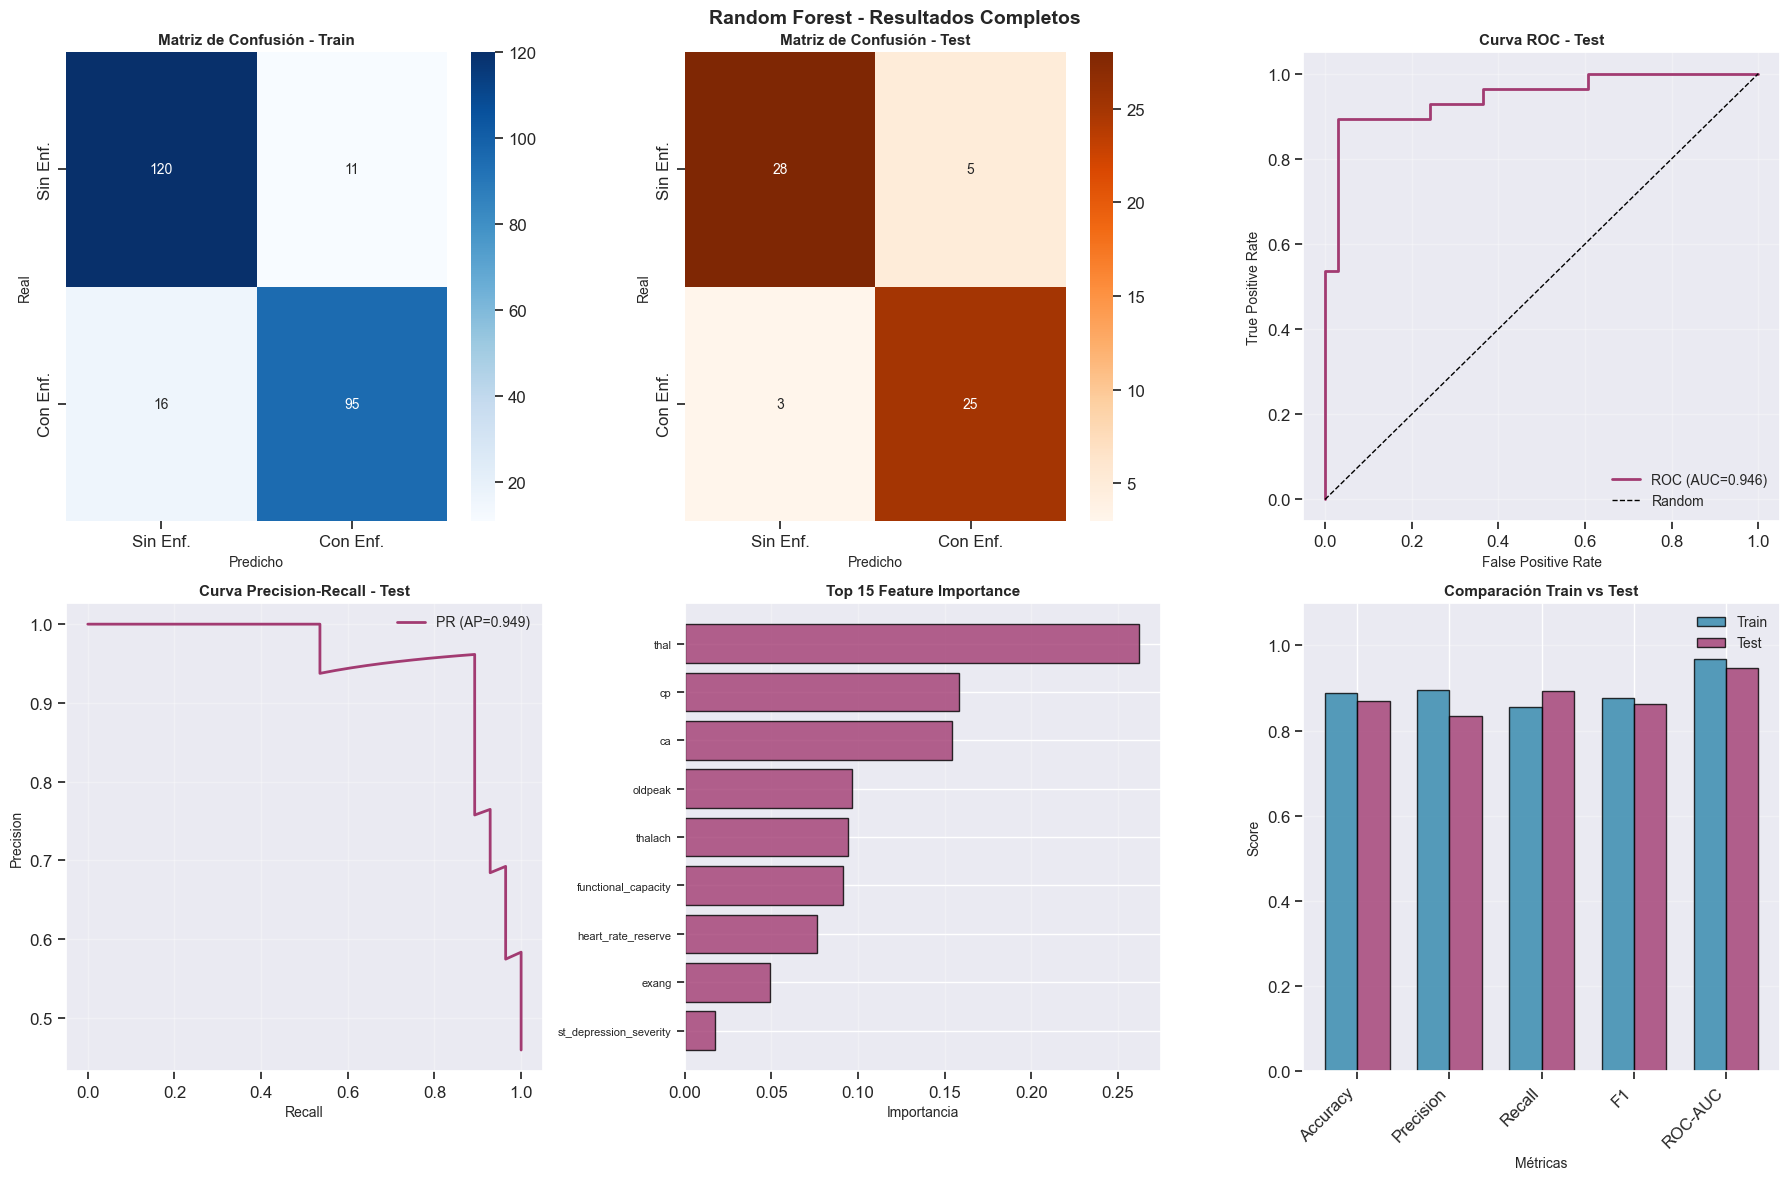

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/16_random_forest_results.png

🔍 ANÁLISIS DE OVERFITTING:

Diferencia Train - Test (Gap):
--------------------------------------------------------------------------------
   • Accuracy    : +0.0196  ✅ OK
   • Precision   : +0.0629  ✅ OK
   • Recall      : -0.0370  ✅ OK
   • F1-Score    : +0.0135  ✅ OK
   • ROC-AUC     : +0.0212  ✅ OK

Gap promedio: 0.0308
✅ Modelo generaliza EXCELENTEMENTE

✓ Modelo guardado: c:\Users\Usuario\Documents\TFM\src\models/random_forest.pkl

RESUMEN: RANDOM FOREST


,Métrica,Train,Test,Gap
0,Accuracy,0.8884,0.8689,0.0196
1,Precision,0.8962,0.8333,0.0629
2,Recall,0.8559,0.8929,-0.0370
3,F1-Score,0.8756,0.8621,0.0135
4,ROC-AUC,0.9671,0.9459,0.0212
5,Sensitivity,0.8559,0.8929,-0.0370
6,Specificity,0.9160,0.8485,0.0675
7,PPV,0.8962,0.8333,0.0629
8,NPV,0.8824,0.9032,-0.0209



✅ Random Forest completado:
   • Tiempo de entrenamiento: 0.52s
   • Número de árboles: 200
   • ROC-AUC (Test): 0.9459
   • Sensibilidad (Test): 0.8929
   • Especificidad (Test): 0.8485
   • Gap promedio: 0.0308


📊 COMPARACIÓN: Logistic Regression vs Random Forest


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Sensitivity,Specificity
0,Logistic Regression,0.8689,0.8125,0.9286,0.8667,0.9394,0.9286,0.8182
1,Random Forest,0.8689,0.8333,0.8929,0.8621,0.9459,0.8929,0.8485



🏆 Random Forest supera a Logistic Regression por 0.0065 en ROC-AUC

6.3 MODELO 3: XGBOOST ⭐ [RECOMENDADO]

🔧 Configuración del modelo:
--------------------------------------------------------------------------------
✓ Modelo configurado:
   • N estimators: 200
   • Max depth: 6
   • Learning rate: 0.1
   • Subsample: 0.8
   • Colsample bytree: 0.8
   • Gamma (min split loss): 0.1
   • Reg alpha (L1): 0.1
   • Reg lambda (L2): 1.0
   • Scale pos weight: 1.180
   • Random state: 42
   • Dataset: SIN ESCALAR (original)

🎯 Entrenando modelo con early stopping...
--------------------------------------------------------------------------------
✓ Usando todas las iteraciones: 200
   Reentrenando con todos los datos...
✓ Modelo entrenado en 0.22 segundos
   • N estimators final: 200

📊 Validación Cruzada (StratifiedKFold, k=5):
--------------------------------------------------------------------------------
   • ACCURACY    : 0.7851 (±0.0165)
   • PRECISION   : 0.7650 (±0.0362)
   • RECALL   

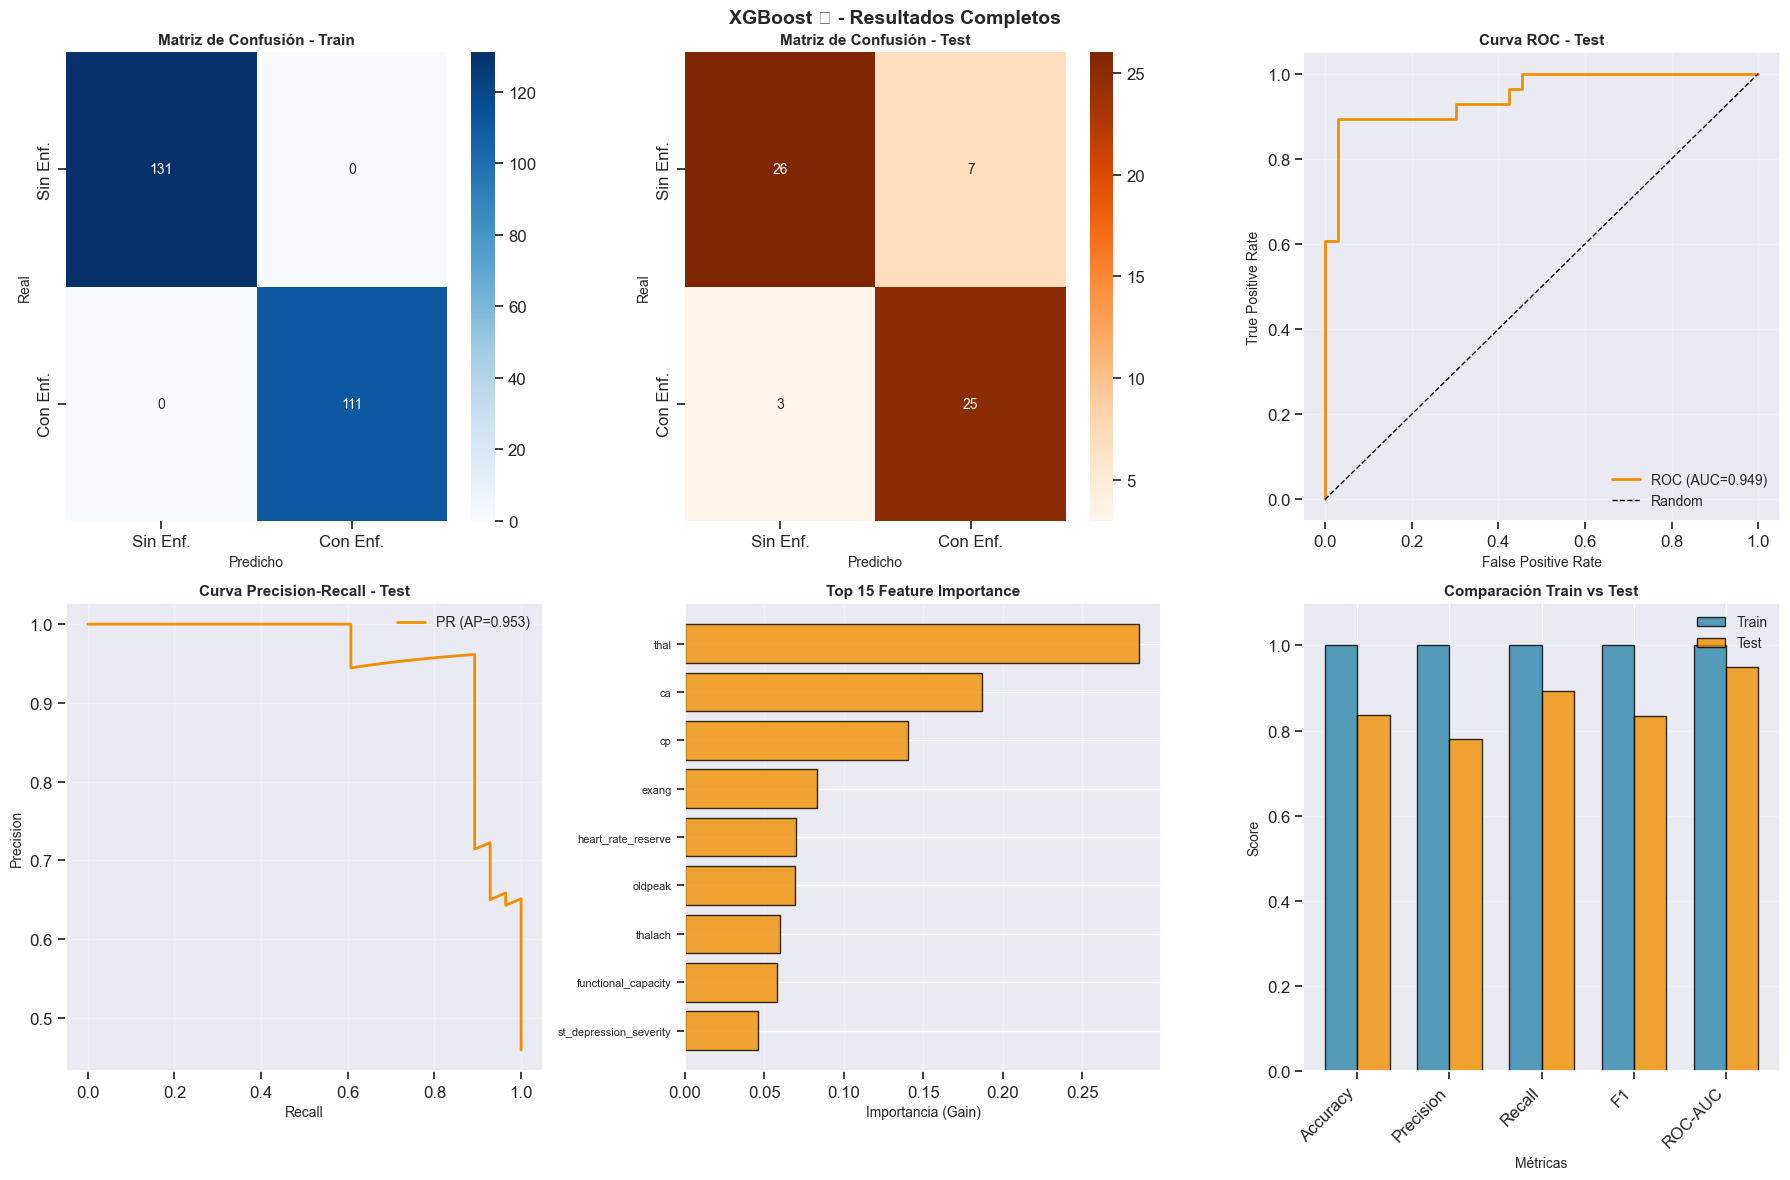

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/17_xgboost_results.png

🔍 ANÁLISIS DE OVERFITTING:

Diferencia Train - Test (Gap):
--------------------------------------------------------------------------------
   • Accuracy    : +0.1639  ❌ Overfitting
   • Precision   : +0.2188  ❌ Overfitting
   • Recall      : +0.1071  ⚠️  Revisar
   • F1-Score    : +0.1667  ❌ Overfitting
   • ROC-AUC     : +0.0509  ✅ OK

Gap promedio: 0.1415
⚠️  Ligero overfitting - Considerar más regularización

✓ Modelo guardado: c:\Users\Usuario\Documents\TFM\src\models/xgboost.pkl

RESUMEN: XGBOOST ⭐


,Métrica,Train,Test,Gap
0,Accuracy,1.0,0.8361,0.1639
1,Precision,1.0,0.7812,0.2188
2,Recall,1.0,0.8929,0.1071
3,F1-Score,1.0,0.8333,0.1667
4,ROC-AUC,1.0,0.9491,0.0509
5,Sensitivity,1.0,0.8929,0.1071
6,Specificity,1.0,0.7879,0.2121
7,PPV,1.0,0.7812,0.2188
8,NPV,1.0,0.8966,0.1034



✅ XGBoost completado:
   • Tiempo de entrenamiento: 0.22s
   • N estimators (best): 200
   • ROC-AUC (Test): 0.9491
   • Sensibilidad (Test): 0.8929
   • Especificidad (Test): 0.7879
   • Gap promedio: 0.1415


📊 COMPARACIÓN: LR vs RF vs XGBoost


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Sensitivity,Specificity
0,Logistic Regression,0.8689,0.8125,0.9286,0.8667,0.9394,0.9286,0.8182
1,Random Forest,0.8689,0.8333,0.8929,0.8621,0.9459,0.8929,0.8485
2,XGBoost ⭐,0.8361,0.7812,0.8929,0.8333,0.9491,0.8929,0.7879



🏆 Mejor modelo hasta ahora: XGBoost ⭐
   ROC-AUC: 0.9491

6.4 MODELO 4: LIGHTGBM 💡

🔧 Configuración del modelo:
--------------------------------------------------------------------------------
✓ Modelo configurado:
   • N estimators: 200
   • Max depth: 7
   • Learning rate: 0.05
   • Num leaves: 31
   • Subsample: 0.8
   • Colsample bytree: 0.8
   • Reg alpha (L1): 0.1
   • Reg lambda (L2): 0.1
   • Min child samples: 10
   • Class weight: balanced
   • Random state: 42
   • Dataset: SIN ESCALAR (original)

🎯 Entrenando modelo con early stopping...
--------------------------------------------------------------------------------
✓ Mejor iteración encontrada: 7
   Reentrenando con todos los datos...
✓ Modelo entrenado en 0.06 segundos
   • N estimators final: 7

📊 Validación Cruzada (StratifiedKFold, k=5):
--------------------------------------------------------------------------------
   • ACCURACY    : 0.8015 (±0.0179)
   • PRECISION   : 0.7789 (±0.0431)
   • RECALL      : 0.8008 (±0

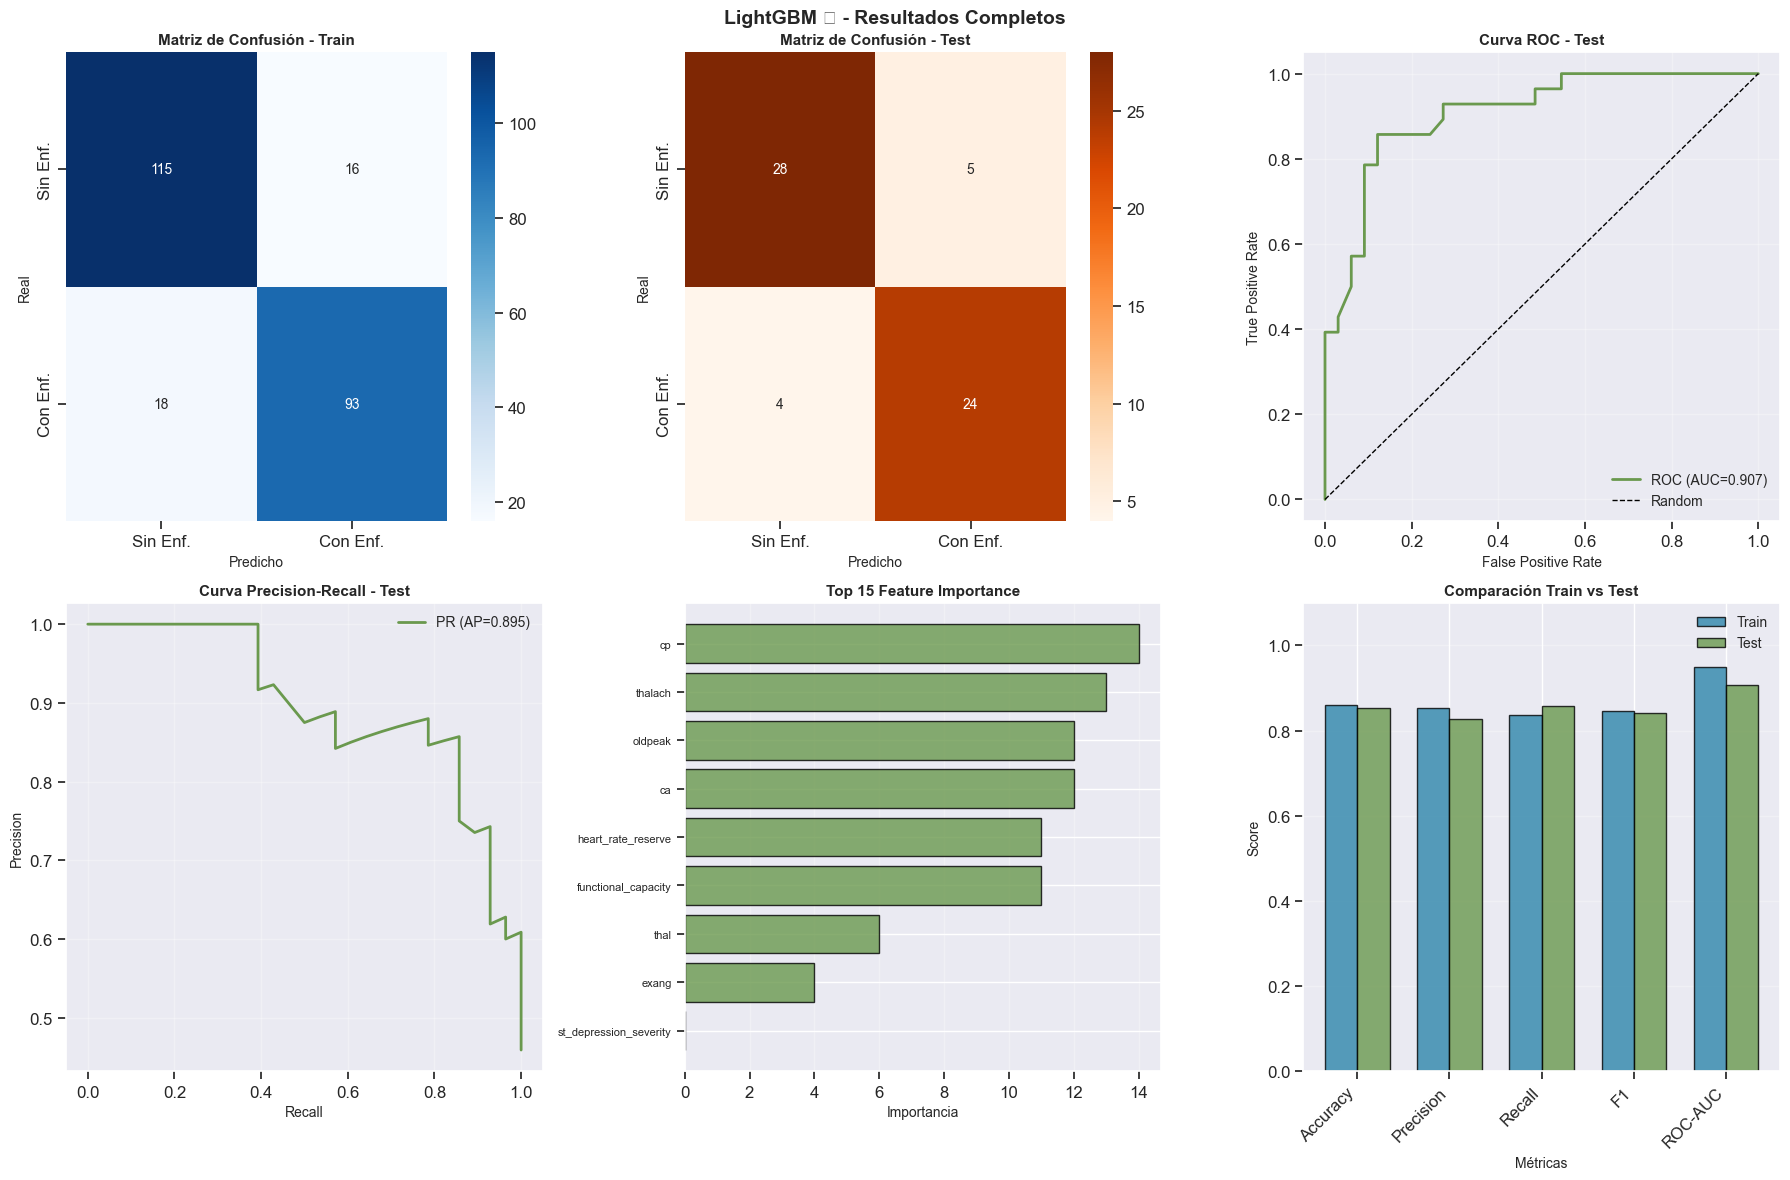

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/18_lightgbm_results.png

🔍 ANÁLISIS DE OVERFITTING:

Diferencia Train - Test (Gap):
--------------------------------------------------------------------------------
   • Accuracy    : +0.0070  ✅ OK
   • Precision   : +0.0256  ✅ OK
   • Recall      : -0.0193  ✅ OK
   • F1-Score    : +0.0033  ✅ OK
   • ROC-AUC     : +0.0412  ✅ OK

Gap promedio: 0.0193
✅ Modelo generaliza EXCELENTEMENTE

✓ Modelo guardado: c:\Users\Usuario\Documents\TFM\src\models/lightgbm.pkl

RESUMEN: LIGHTGBM 💡


,Métrica,Train,Test,Gap
0,Accuracy,0.8595,0.8525,0.0070
1,Precision,0.8532,0.8276,0.0256
2,Recall,0.8378,0.8571,-0.0193
3,F1-Score,0.8455,0.8421,0.0033
4,ROC-AUC,0.9486,0.9075,0.0412
5,Sensitivity,0.8378,0.8571,-0.0193
6,Specificity,0.8779,0.8485,0.0294
7,PPV,0.8532,0.8276,0.0256
8,NPV,0.8647,0.8750,-0.0103



✅ LightGBM completado:
   • Tiempo de entrenamiento: 0.06s
   • N estimators (best): 7
   • ROC-AUC (Test): 0.9075
   • Sensibilidad (Test): 0.8571
   • Especificidad (Test): 0.8485
   • Gap promedio: 0.0193


📊 COMPARACIÓN: LR vs RF vs XGBoost vs LightGBM


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Sensitivity,Specificity,Training Time (s)
0,Logistic Regression,0.8689,0.8125,0.9286,0.8667,0.9394,0.9286,0.8182,0.0312
1,Random Forest,0.8689,0.8333,0.8929,0.8621,0.9459,0.8929,0.8485,0.5187
2,XGBoost ⭐,0.8361,0.7812,0.8929,0.8333,0.9491,0.8929,0.7879,0.2242
3,LightGBM 💡,0.8525,0.8276,0.8571,0.8421,0.9075,0.8571,0.8485,0.0590



🏆 Ranking de Modelos (por ROC-AUC):
--------------------------------------------------------------------------------
🥉 XGBoost ⭐                : ROC-AUC = 0.9491
🥈 Random Forest            : ROC-AUC = 0.9459
🥇 Logistic Regression      : ROC-AUC = 0.9394
   LightGBM 💡               : ROC-AUC = 0.9075

6.5 MODELO 5: CATBOOST 🐱

🔧 Configuración del modelo:
--------------------------------------------------------------------------------
✓ Features categóricas identificadas y convertidas: 5
   Variables categóricas:
      • thal
      • ca
      • cp
      • exang
      • st_depression_severity

✓ Modelo configurado:
   • Iterations: 200
   • Depth: 6
   • Learning rate: 0.1
   • L2 leaf reg: 3
   • Auto class weights: Balanced
   • Random seed: 42
   • Cat features: 5
   • Dataset: SIN ESCALAR (original)

🎯 Entrenando modelo con early stopping...
--------------------------------------------------------------------------------
✓ Mejor iteración encontrada: 4
   Reentrenando con todos los 

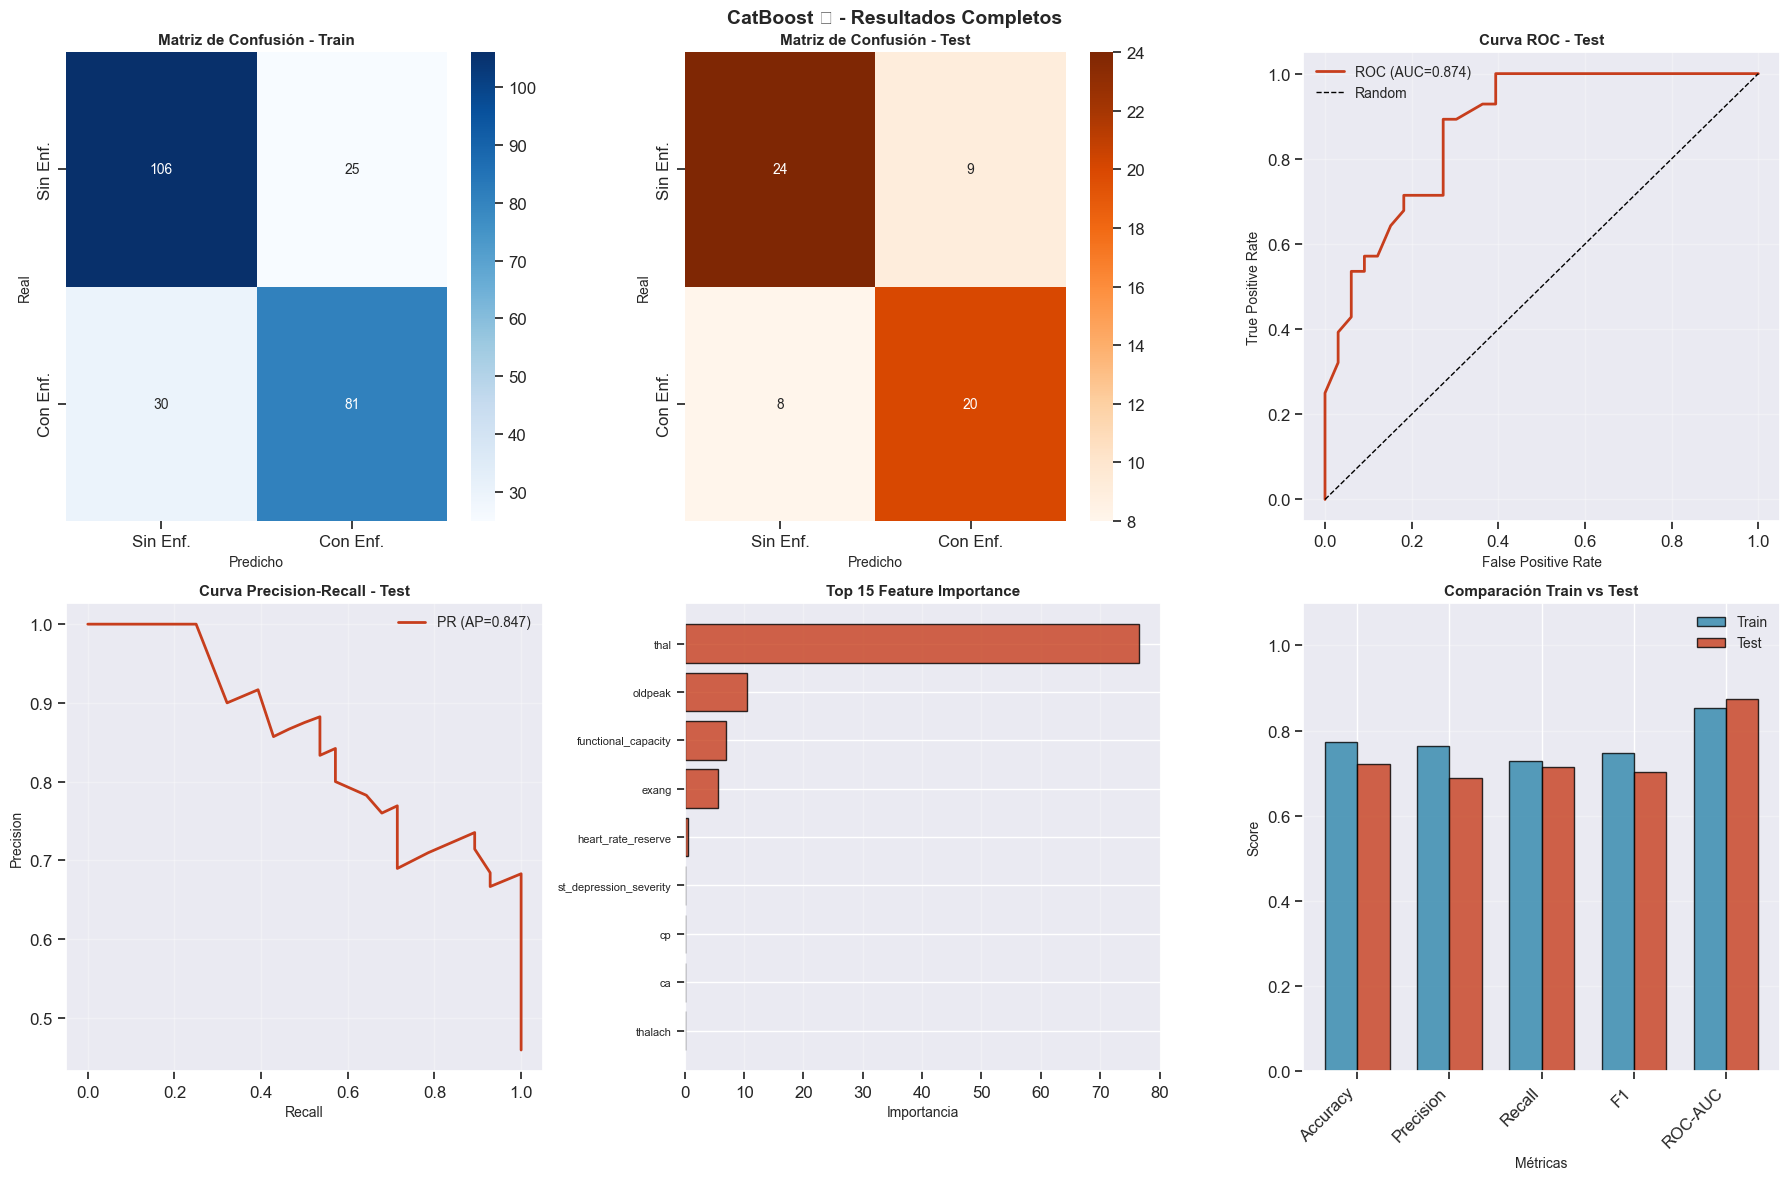

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/19_catboost_results.png

🔍 ANÁLISIS DE OVERFITTING:

Diferencia Train - Test (Gap):
--------------------------------------------------------------------------------
   • Accuracy    : +0.0514  ✅ OK
   • Precision   : +0.0745  ✅ OK
   • Recall      : +0.0154  ✅ OK
   • F1-Score    : +0.0448  ✅ OK
   • ROC-AUC     : -0.0220  ✅ OK

Gap promedio: 0.0416
✅ Modelo generaliza EXCELENTEMENTE

✓ Modelo guardado: c:\Users\Usuario\Documents\TFM\src\models/catboost.pkl

RESUMEN: CATBOOST 🐱


,Métrica,Train,Test,Gap
0,Accuracy,0.7727,0.7213,0.0514
1,Precision,0.7642,0.6897,0.0745
2,Recall,0.7297,0.7143,0.0154
3,F1-Score,0.7465,0.7018,0.0448
4,ROC-AUC,0.8525,0.8745,-0.0220
5,Sensitivity,0.7297,0.7143,0.0154
6,Specificity,0.8092,0.7273,0.0819
7,PPV,0.7642,0.6897,0.0745
8,NPV,0.7794,0.7500,0.0294



✅ CatBoost completado:
   • Tiempo de entrenamiento: 1.04s
   • Iterations (best): 4
   • ROC-AUC (Test): 0.8745
   • Sensibilidad (Test): 0.7143
   • Especificidad (Test): 0.7273
   • Gap promedio: 0.0416


6.6 COMPARACIÓN DE MODELOS BASE

📊 TABLA COMPARATIVA COMPLETA - TEST SET:


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Sensitivity,Specificity,PPV,NPV,Training Time (s)
0,Logistic Regression,0.8689,0.8125,0.9286,0.8667,0.9394,0.9286,0.8182,0.8125,0.9310,0.0312
1,Random Forest,0.8689,0.8333,0.8929,0.8621,0.9459,0.8929,0.8485,0.8333,0.9032,0.5187
2,XGBoost ⭐,0.8361,0.7812,0.8929,0.8333,0.9491,0.8929,0.7879,0.7812,0.8966,0.2242
3,LightGBM 💡,0.8525,0.8276,0.8571,0.8421,0.9075,0.8571,0.8485,0.8276,0.8750,0.0590
4,CatBoost 🐱,0.7213,0.6897,0.7143,0.7018,0.8745,0.7143,0.7273,0.6897,0.7500,1.0418



🏆 RANKING DE MODELOS POR MÉTRICA:

📈 Accuracy:
--------------------------------------------------------------------------------
   🥇 1. Logistic Regression      : 0.8689
   🥈 2. Random Forest            : 0.8689
   🥉 3. LightGBM 💡               : 0.8525
      4. XGBoost ⭐                : 0.8361
      5. CatBoost 🐱               : 0.7213

📈 Precision:
--------------------------------------------------------------------------------
   🥇 1. Random Forest            : 0.8333
   🥈 2. LightGBM 💡               : 0.8276
   🥉 3. Logistic Regression      : 0.8125
      4. XGBoost ⭐                : 0.7812
      5. CatBoost 🐱               : 0.6897

📈 Recall:
--------------------------------------------------------------------------------
   🥇 1. Logistic Regression      : 0.9286
   🥈 2. Random Forest            : 0.8929
   🥉 3. XGBoost ⭐                : 0.8929
      4. LightGBM 💡               : 0.8571
      5. CatBoost 🐱               : 0.7143

📈 F1-Score:
-----------------------------------

,Modelo,Gap Promedio,Evaluación
3,LightGBM,0.0233,✅ Excelente
1,Random Forest,0.0352,✅ Excelente
4,CatBoost,0.0408,✅ Excelente
0,Logistic Regression,0.0589,✅ Buena
2,XGBoost,0.1352,⚠️ Revisar



📊 Interpretación:
--------------------------------------------------------------------------------
   • Gap < 0.05:  Generalización EXCELENTE
   • Gap < 0.10:  Generalización BUENA
   • Gap < 0.15:  Ligero overfitting
   • Gap ≥ 0.15:  Overfitting significativo

🏆 SELECCIÓN DEL MEJOR MODELO:

🥇 MEJOR MODELO: XGBoost ⭐
--------------------------------------------------------------------------------
   • ROC-AUC:       0.9491
   • Accuracy:      0.8361
   • Sensitivity:   0.8929
   • Specificity:   0.7879
   • F1-Score:      0.8333
   • Training Time: 0.22s

🏅 TOP 3 MODELOS (por ROC-AUC):
--------------------------------------------------------------------------------
   🥇 XGBoost ⭐                : ROC-AUC = 0.9491
   🥈 Random Forest            : ROC-AUC = 0.9459
   🥉 Logistic Regression      : ROC-AUC = 0.9394

📊 Generando visualizaciones comparativas...
--------------------------------------------------------------------------------


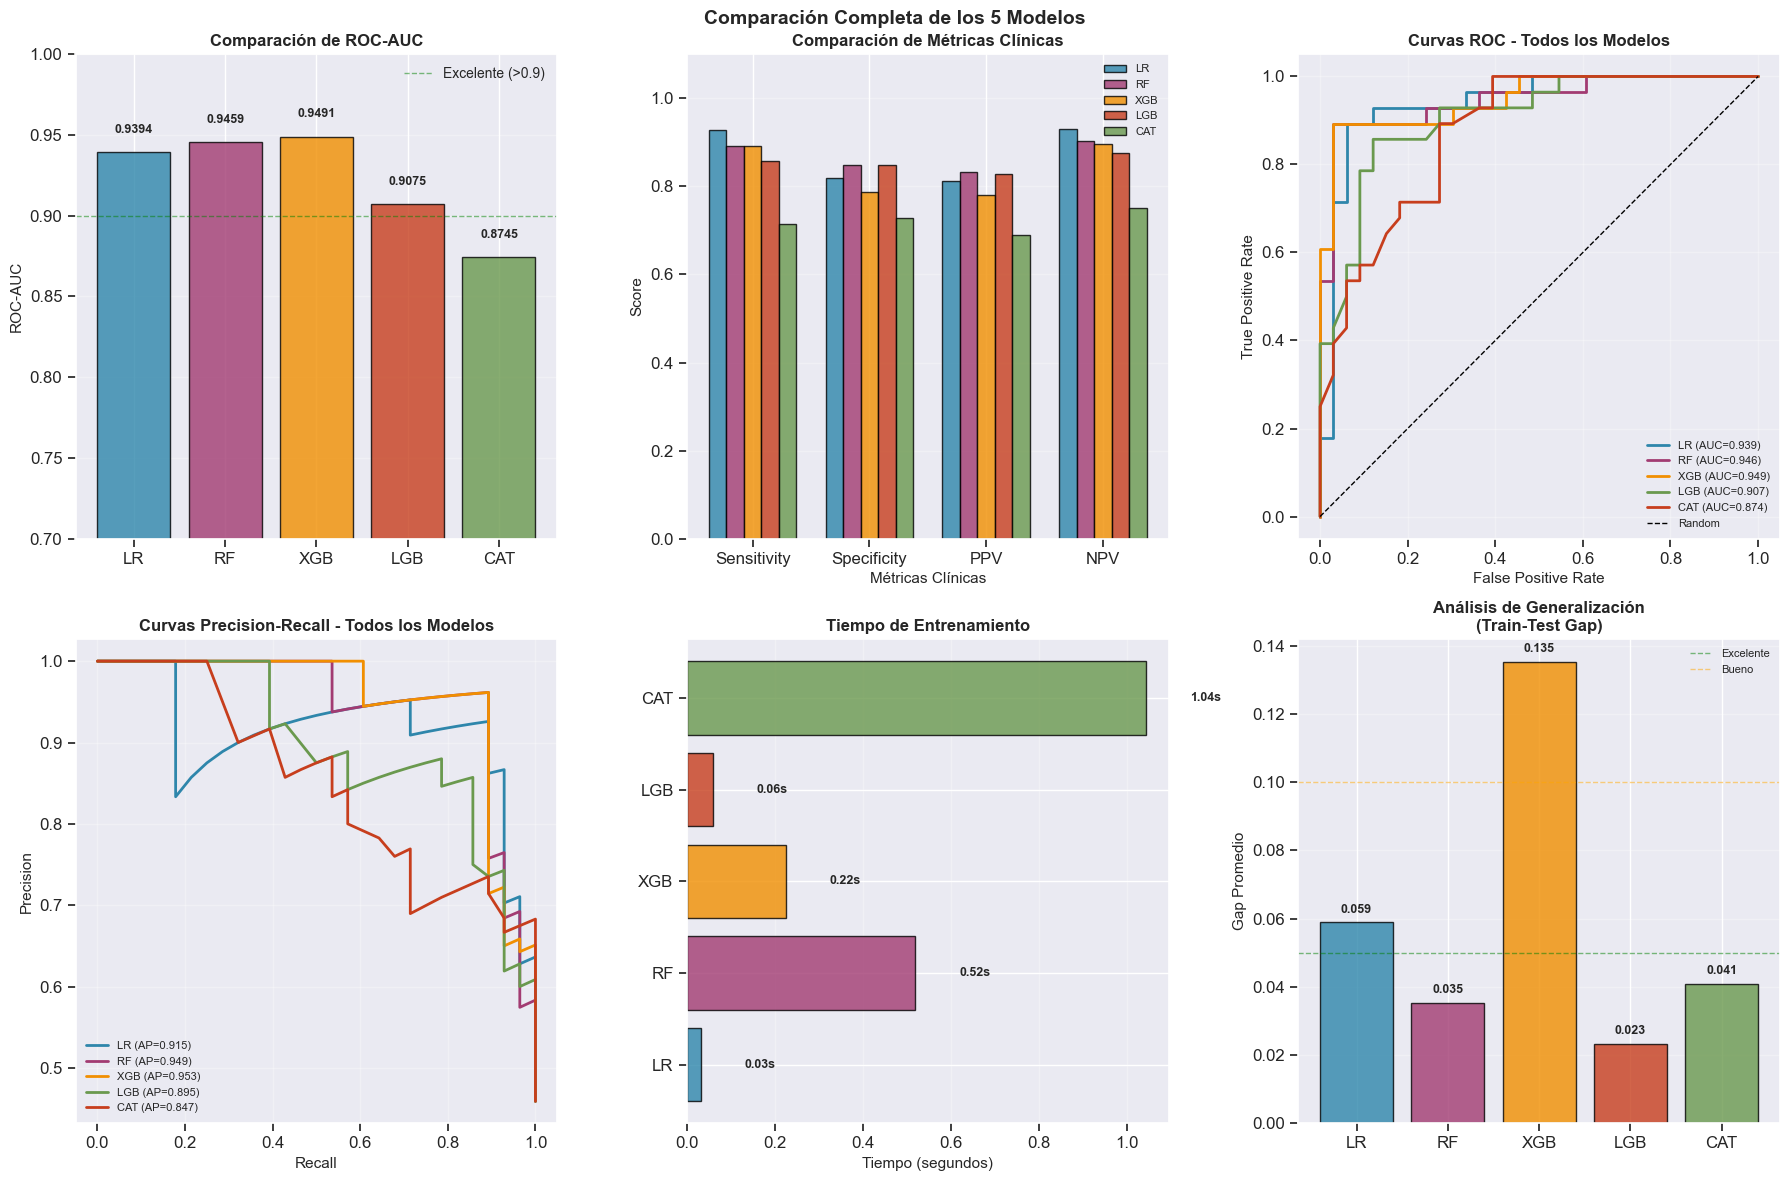

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/20_models_comparison.png

📊 ANÁLISIS ESTADÍSTICO DE DIFERENCIAS:

Diferencias con el mejor modelo (XGBoost ⭐):
--------------------------------------------------------------------------------
   • Logistic Regression      : +0.0097 (+1.03%) - ≈ Prácticamente igual
   • Random Forest            : +0.0032 (+0.34%) - ≈ Prácticamente igual
   • LightGBM 💡               : +0.0417 (+4.39%) - Diferencia moderada
   • CatBoost 🐱               : +0.0747 (+7.87%) - Diferencia significativa

RESUMEN EJECUTIVO DE LA COMPARACIÓN

🏆 MEJOR MODELO: XGBoost ⭐
   • ROC-AUC Test: 0.9491
   • Accuracy: 0.8361
   • Sensitivity: 0.8929
   • Specificity: 0.7879

📊 RANKING GENERAL (por ROC-AUC):

   🥇 XGBoost ⭐                : 0.9491
   🥈 Random Forest            : 0.9459
   🥉 Logistic Regression      : 0.9394
   4. LightGBM 💡               : 0.9075
   5. CatBoost 🐱               : 0.8745

⚡ MODELO MÁS RÁPIDO: Logistic Regression
   • Tiempo: 0.03

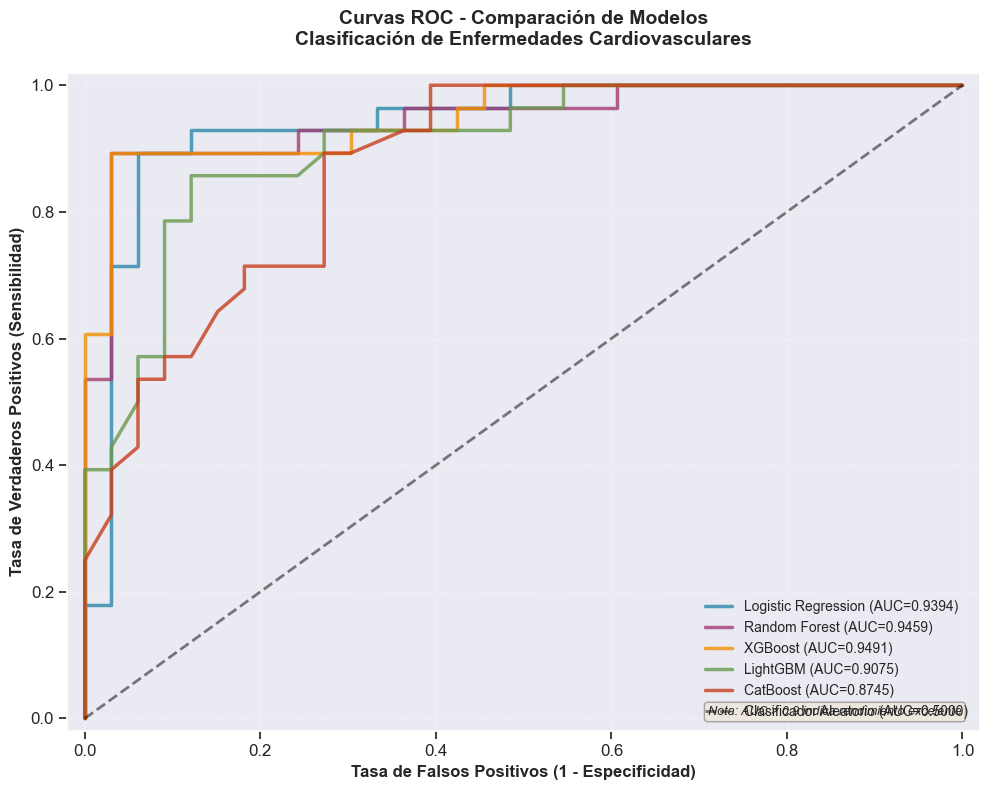

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/21_roc_curves_all_models.png

📊 Generando curvas Precision-Recall consolidadas...
--------------------------------------------------------------------------------


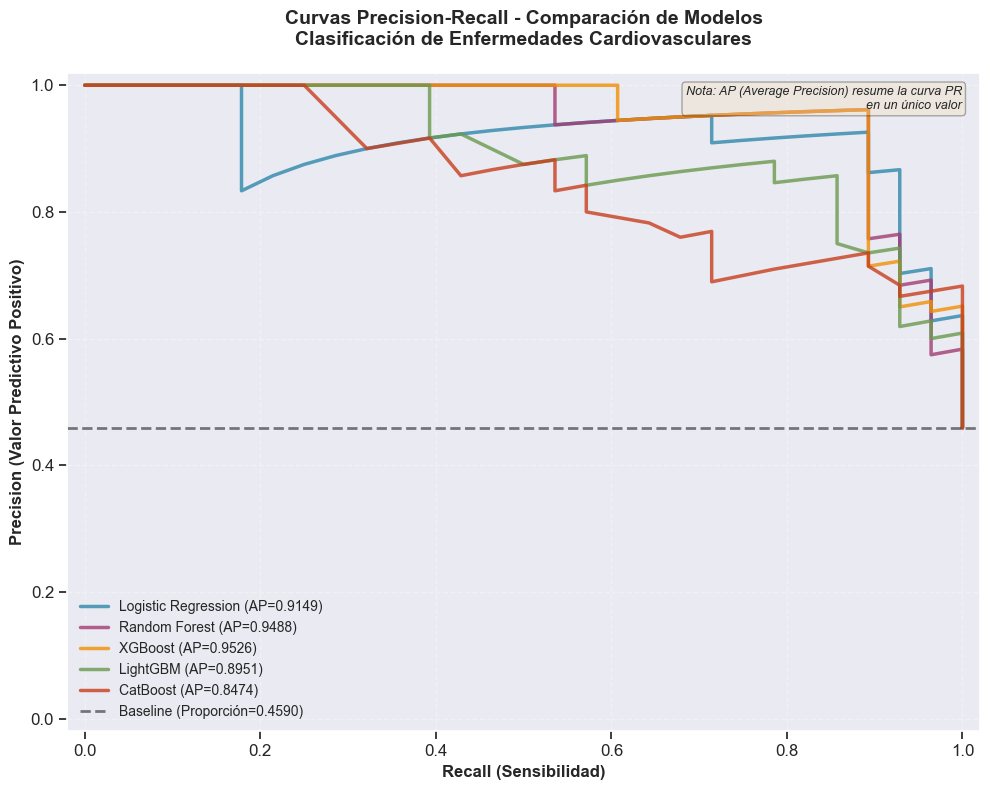

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/22_pr_curves_all_models.png

📊 Generando comparación de Feature Importance...
--------------------------------------------------------------------------------
🔍 Verificando columnas de DataFrames...
✓ Columnas verificadas
✓ 9 features únicas identificadas
✓ Random Forest integrado
✓ XGBoost integrado
✓ LightGBM integrado
✓ CatBoost integrado
✓ DataFrame consolidado creado: (9, 6)


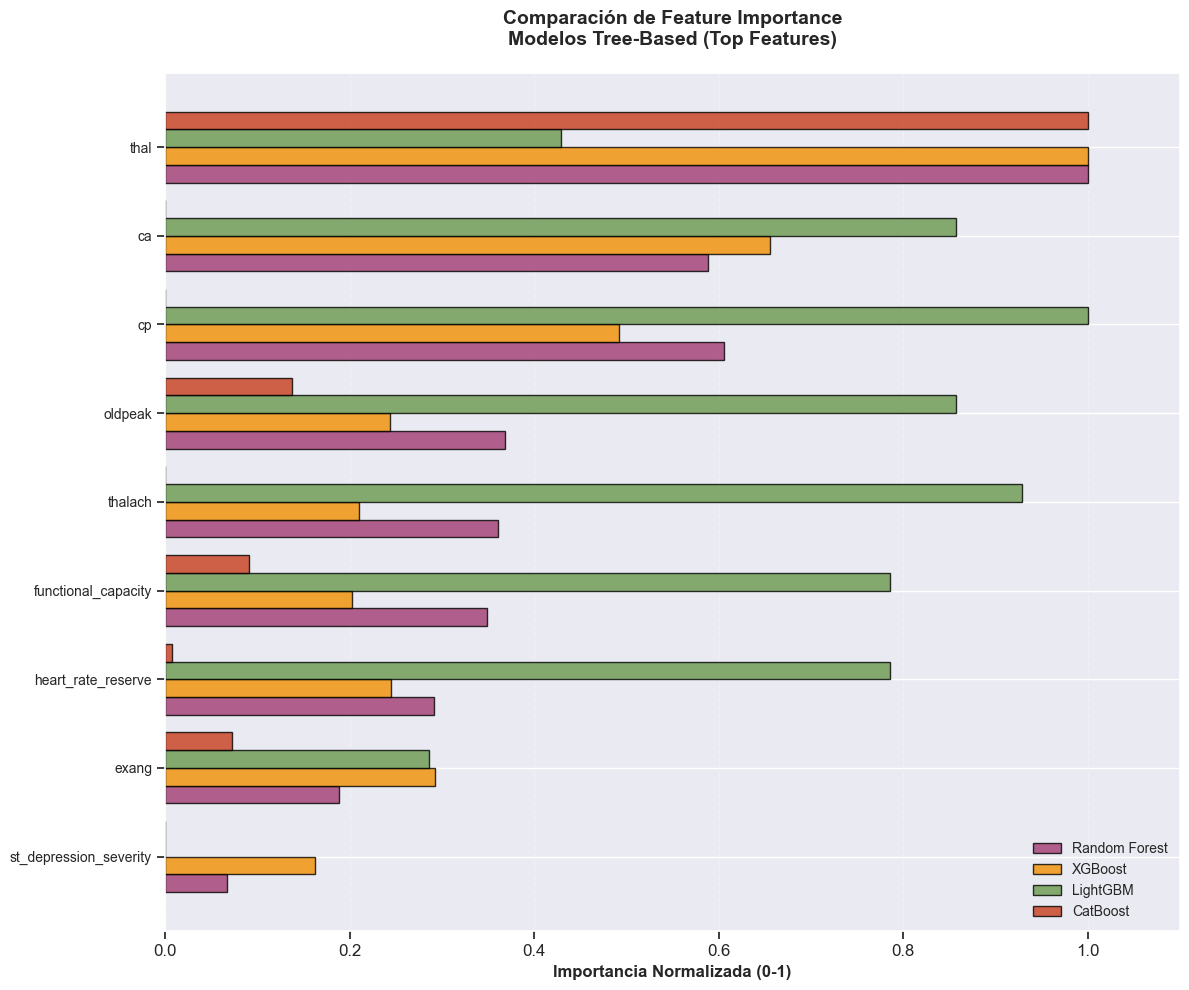

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/23_feature_importance_comparison.png
✓ Tabla guardada: c:\Users\Usuario\Documents\TFM\src\outputs/feature_importance_comparison.csv

🌟 TOP 5 FEATURES MÁS CONSISTENTES (Promedio entre modelos):

thal:
   • Importancia Promedio: 0.8571
   • Random Forest:  1.0000
   • XGBoost:        1.0000
   • LightGBM:       0.4286
   • CatBoost:       1.0000

ca:
   • Importancia Promedio: 0.5253
   • Random Forest:  0.5883
   • XGBoost:        0.6557
   • LightGBM:       0.8571
   • CatBoost:       0.0000

cp:
   • Importancia Promedio: 0.5243
   • Random Forest:  0.6052
   • XGBoost:        0.4919
   • LightGBM:       1.0000
   • CatBoost:       0.0000

oldpeak:
   • Importancia Promedio: 0.4014
   • Random Forest:  0.3681
   • XGBoost:        0.2434
   • LightGBM:       0.8571
   • CatBoost:       0.1370

thalach:
   • Importancia Promedio: 0.3748
   • Random Forest:  0.3607
   • XGBoost:        0.2099
   • LightGBM:       0.9286
   • C

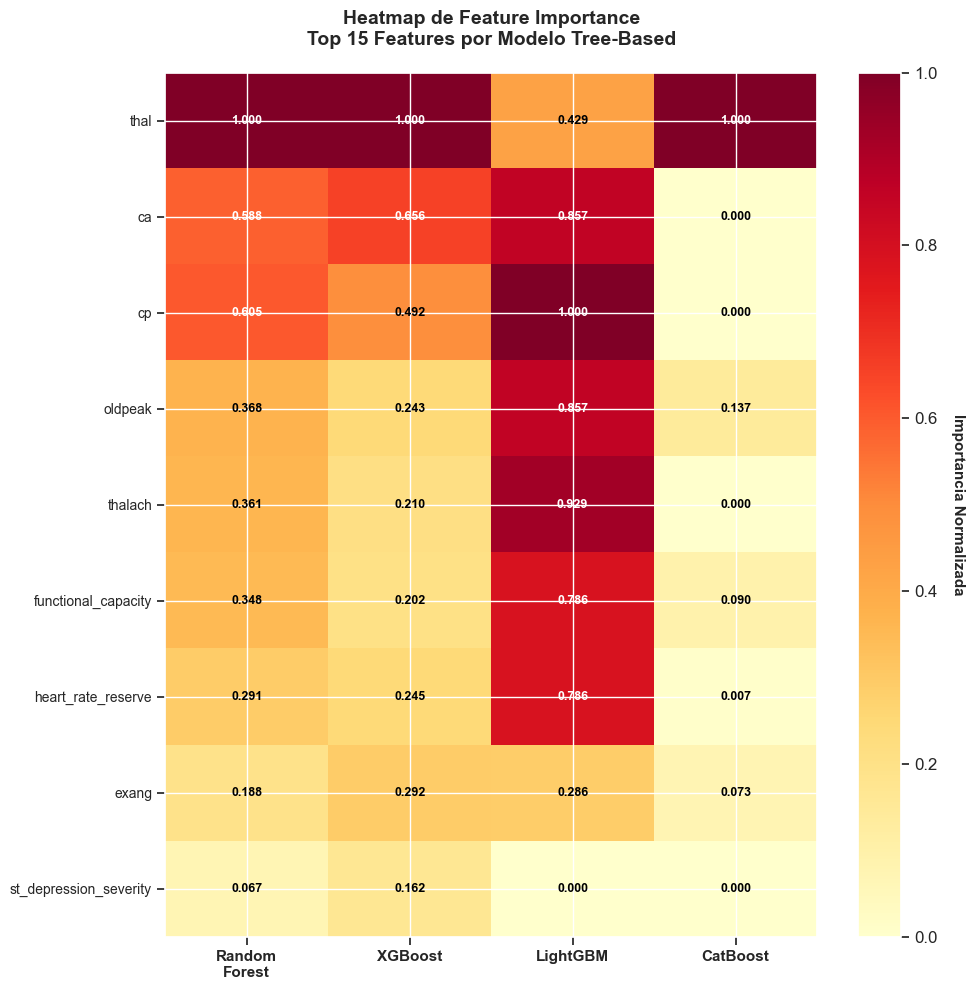

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/24_feature_importance_heatmap.png

RESUMEN: VISUALIZACIONES CONSOLIDADAS

✅ Visualizaciones generadas:
   • 21_roc_curves_all_models.png          - Curvas ROC
   • 22_pr_curves_all_models.png           - Curvas Precision-Recall
   • 23_feature_importance_comparison.png  - Comparación de importancia (barras)
   • 24_feature_importance_heatmap.png     - Heatmap de importancia

📊 Archivos CSV generados:
   • feature_importance_comparison.csv     - Tabla de importancias

🌟 Top 5 Features Más Importantes (Promedio):

   • thal                     : 0.8571
   • ca                       : 0.5253
   • cp                       : 0.5243
   • oldpeak                  : 0.4014
   • thalach                  : 0.3748


In [7]:
print("\n" + "="*80)
print("CAPÍTULO 6: MODELADO - 5 MODELOS ESENCIALES")
print("="*80)
%run notebooks/06_modeling.ipynb

## Capitulo 7: Interpretabilidad


CAPÍTULO 7: INTERPRETABILIDAD DEL MODELO
Cargando datos y modelos...
✓ Cargado: c:\Users\Usuario\Documents\TFM\src\data\processed\final_datasets.pkl

✓ Modelos y datos cargados correctamente

6.8 RESUMEN FINAL DE MODELADO

📊 TABLA RESUMEN EJECUTIVA:


,Modelo,ROC-AUC,Accuracy,Sensitivity,Specificity,F1-Score,PPV,NPV,Training Time (s),Gap
0,Logistic Regression,0.9394,0.8689,0.9286,0.8182,0.8667,0.8125,0.9310,0.0312,0.0589
1,Random Forest,0.9459,0.8689,0.8929,0.8485,0.8621,0.8333,0.9032,0.5187,0.0352
2,XGBoost ⭐,0.9491,0.8361,0.8929,0.7879,0.8333,0.7812,0.8966,0.2242,0.1352
3,LightGBM 💡,0.9075,0.8525,0.8571,0.8485,0.8421,0.8276,0.8750,0.0590,0.0233
4,CatBoost 🐱,0.8745,0.7213,0.7143,0.7273,0.7018,0.6897,0.7500,1.0418,0.0408



✓ Tabla resumen guardada: c:\Users\Usuario\Documents\TFM\src\outputs/modelado_resumen_final.csv

🏆 MODELO SELECCIONADO COMO MEJOR

🥇 MEJOR MODELO: XGBoost ⭐

📊 Métricas de Rendimiento:
--------------------------------------------------------------------------------
   • ROC-AUC:       0.9491
   • Accuracy:      0.8361
   • F1-Score:      0.8333

🏥 Métricas Clínicas:
--------------------------------------------------------------------------------
   • Sensibilidad:  0.8929  (Tasa de Verdaderos Positivos)
   • Especificidad: 0.7879  (Tasa de Verdaderos Negativos)
   • VPP (PPV):     0.7812  (Valor Predictivo Positivo)
   • VPN (NPV):     0.8966  (Valor Predictivo Negativo)

⚡ Eficiencia:
--------------------------------------------------------------------------------
   • Tiempo de Entrenamiento: 0.22 segundos
   • Gap Train-Test:          0.1352
   • Evaluación Gap:          ACEPTABLE - Ligero overfitting

📊 RANKING COMPLETO DE MODELOS

🏅 Por ROC-AUC (Métrica Principal):
--------------

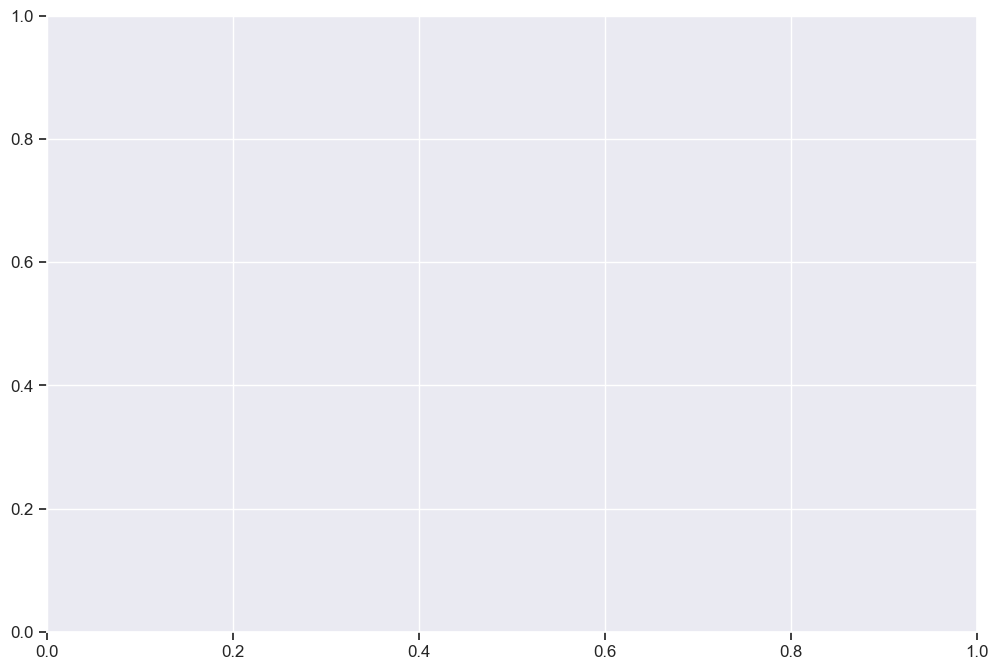

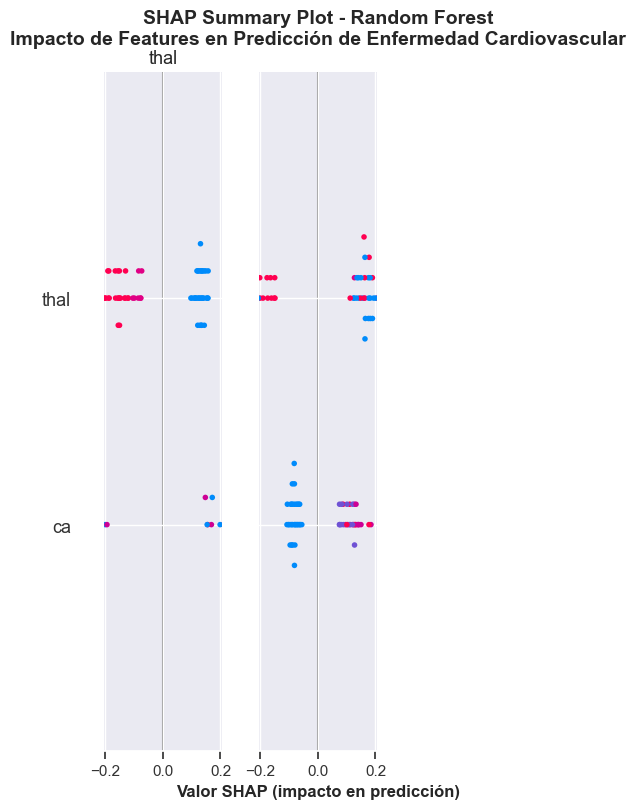

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/25_shap_summary_random_forest.png

📊 Feature Importance basada en SHAP (Random Forest)...
--------------------------------------------------------------------------------
🔍 Shape de shap_values_rf: <class 'numpy.ndarray'>
   Shape directo: (61, 15, 2)
   Shape de shap_values_rf_class1: (61, 15, 2)
⚠️  Detectadas 3 dimensiones, ajustando...
   Nueva shape: (61, 15)
   Shape de mean_abs_shap: (15,)
   Número de features: 9
⚠️  ADVERTENCIA: Dimensiones no coinciden!
   mean_abs_shap: 15
   selected_features: 9
   Usando features del dataset de test: 15
   ✓ Dimensiones ajustadas correctamente

✓ DataFrame creado correctamente
   Shape: (15, 2)

Top 10 Features (por SHAP):
--------------------------------------------------------------------------------
   thal                     : 0.1364
   ca                       : 0.0985
   cp                       : 0.0874
   oldpeak                  : 0.0510
   thalach                  : 0

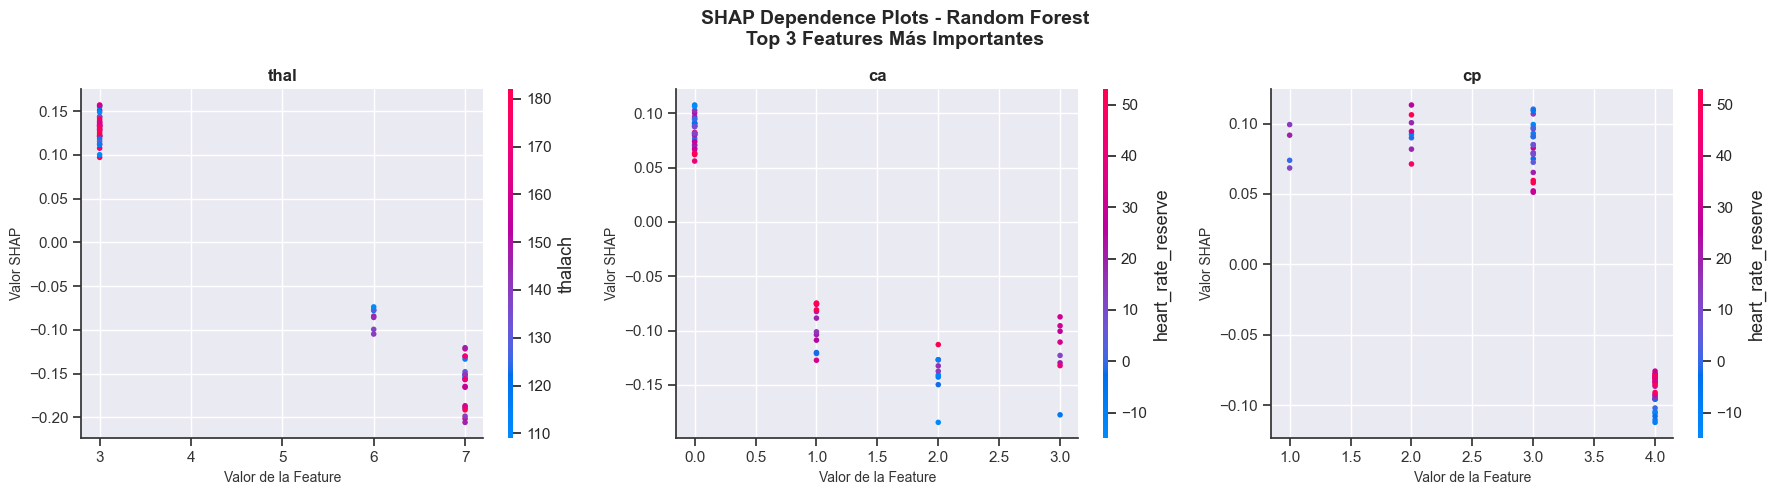

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/27_shap_dependence_rf.png

📊 Generando Force Plot para casos ejemplo (Random Forest)...
--------------------------------------------------------------------------------

Casos seleccionados para Force Plots:
   • Caso 1: Alto Riesgo (TP)
     Real: SÍ, Predicho: SÍ, Probabilidad: 0.994
   • Caso 2: Bajo Riesgo (TN)
     Real: NO, Predicho: NO, Probabilidad: 0.010
   • Caso 3: Borderline
     Real: NO, Predicho: SÍ, Probabilidad: 0.526

🔄 Generando Force Plots interactivos...
   ✓ c:\Users\Usuario\Documents\TFM\src\outputs/28_shap_force_rf_caso_1.html
   ✓ c:\Users\Usuario\Documents\TFM\src\outputs/28_shap_force_rf_caso_2.html
   ✓ c:\Users\Usuario\Documents\TFM\src\outputs/28_shap_force_rf_caso_3.html


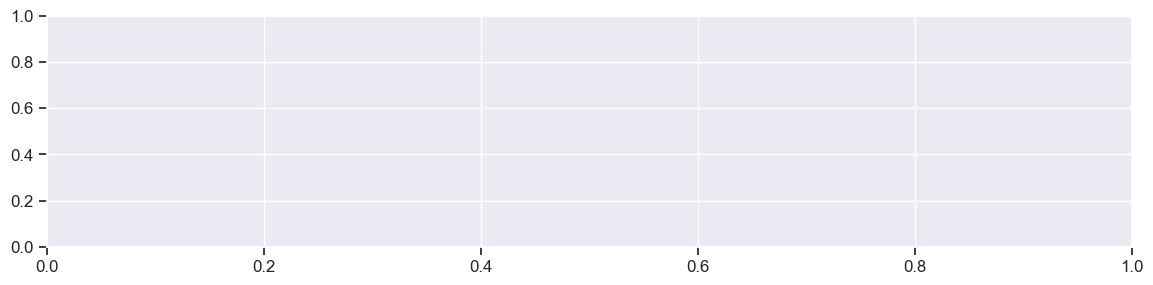

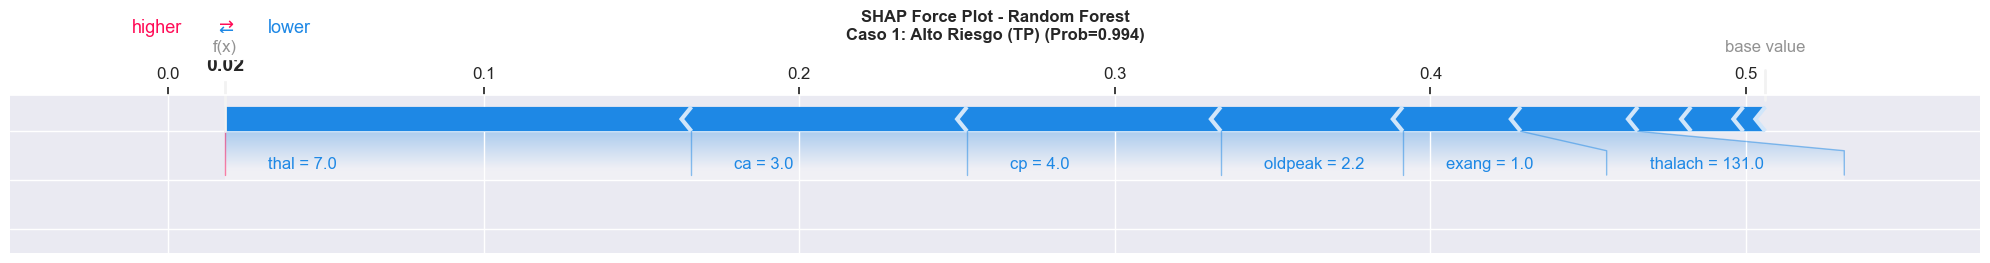

✓ Figura guardada: c:\Users\Usuario\Documents\TFM\src\outputs/28_shap_force_rf_example.png

7.4 ANÁLISIS DE INTERPRETABILIDAD: LOGISTIC REGRESSION

📊 Para Logistic Regression, usamos los coeficientes del modelo...
   (Los coeficientes indican la importancia y dirección del efecto)
--------------------------------------------------------------------------------
⚠️  Error al extraer coeficientes: All arrays must be of the same length
   Continuando sin análisis de Logistic Regression...

7.10 RESUMEN FINAL DE INTERPRETABILIDAD

📊 COMPARACIÓN: TOP FEATURES POR MODELO

🌲 Random Forest (Top 10 por SHAP):
--------------------------------------------------------------------------------


,Feature,RF_Importance
0,thal,0.1364
1,ca,0.0985
3,cp,0.0874
6,oldpeak,0.0510
2,thalach,0.0349
4,exang,0.0324
7,functional_capacity,0.0263
5,heart_rate_reserve,0.0217
8,st_depression_severity,0.0116
9,age_group,0.0000


⚠️  Importancia de coeficientes para LR no disponible

HALLAZGOS PRINCIPALES DE INTERPRETABILIDAD

📋 RESUMEN DE ANÁLISIS:

1️⃣  RANDOM FOREST:
   • Análisis mediante SHAP values
   • Captura interacciones complejas entre features
   • Proporciona explicaciones a nivel de instancia

2️⃣  LOGISTIC REGRESSION:
   • Análisis mediante coeficientes del modelo
   • Interpretación lineal directa
   • Muestra efecto exacto de cada feature

3️⃣  FEATURES MÁS CONSISTENTES:
   • Features que aparecen como importantes en AMBOS modelos
   • Mayor confianza en su relevancia predictiva
   • Candidatos para interpretación clínica

✅ CONCLUSIÓN:
   La combinación de ambos métodos proporciona una visión completa
   de qué features son importantes y cómo afectan las predicciones.



In [8]:
print("\n" + "="*80)
print("CAPÍTULO 7: INTERPRETABILIDAD DEL MODELO")
print("="*80)
%run notebooks/07_interpretability.ipynb

# Capitulo 8: Conclusiones

## Pipeline Summary

In [9]:
print("\n" + "="*80)
print("PIPELINE EXECUTION COMPLETE")
print("="*80)

# Load and display final results
import pandas as pd
import os

# Display model comparison if it exists
summary_file = os.path.join(OUTPUT_DIR, 'models_comparison_summary.csv')
if os.path.exists(summary_file):
    results = pd.read_csv(summary_file)
    print("\nFinal Model Comparison:")
    display(results)
else:
    print("\nNote: Model comparison summary not found.")

print(f"\nOutputs saved to: {OUTPUT_DIR}")
print(f"Models saved to: {MODELS_DIR}")
print(f"Data products saved to: {PROCESSED_DATA_DIR}")
print("\n" + "="*80)
print("Thank you for using this pipeline!")
print("="*80)


PIPELINE EXECUTION COMPLETE

Final Model Comparison:


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Sensitivity,Specificity,PPV,NPV,Training Time (s)
0,Logistic Regression,0.868852,0.812500,0.928571,0.866667,0.939394,0.928571,0.818182,0.812500,0.931034,0.031244
1,Random Forest,0.868852,0.833333,0.892857,0.862069,0.945887,0.892857,0.848485,0.833333,0.903226,0.518685
2,XGBoost ⭐,0.836066,0.781250,0.892857,0.833333,0.949134,0.892857,0.787879,0.781250,0.896552,0.224215
3,LightGBM 💡,0.852459,0.827586,0.857143,0.842105,0.907468,0.857143,0.848485,0.827586,0.875000,0.058974
4,CatBoost 🐱,0.721311,0.689655,0.714286,0.701754,0.874459,0.714286,0.727273,0.689655,0.750000,1.041849



Outputs saved to: c:\Users\Usuario\Documents\TFM\src\outputs
Models saved to: c:\Users\Usuario\Documents\TFM\src\models
Data products saved to: c:\Users\Usuario\Documents\TFM\src\data\processed

Thank you for using this pipeline!


---

## Future Chapters (Planned)

The following chapters are planned but not yet implemented:

- **Chapter 8:** Hyperparameter Tuning
- **Chapter 9:** Exhaustive Evaluation
- **Chapter 10:** Final Validation & Persistence
- **Chapter 11:** Conclusions
- **Chapter 12:** References
- **Chapter 13:** Appendix

To add these chapters, create the corresponding notebooks in the `notebooks/` directory and add `%run` calls above.
